In [1]:
import pandas as pd
import re
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from textblob import Word
import nltk
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
from collections import Counter
import itertools
import string
from pythainlp.corpus import thai_stopwords
from pythainlp import word_tokenize


In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tokyo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tokyo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
df = pd.read_csv ('data_tag/datatestv5.csv')

In [6]:
df.head()

Job_Title  \
0                       GL Account Assistant Manager   
1                                      Tax Associate   
2  Accounts Receivable Supervisor/หัวหน้าหน่วยบัญ...   
3                       Assistant Accounting Manager   
4       Assistant Tax Manager - M&A and tax advisory   

                           Company Location  \
0            MEGA CLINIC Co., Ltd.  Bangkok   
1  PKF Holdings (Thailand) Limited  Bangkok   
2  Sodexo Services (Thailand) Ltd.  Bangkok   
3   Mazars Holding (Thailand) Ltd.  Bangkok   
4   Mazars Holding (Thailand) Ltd.  Bangkok   

                             Job_Position   Job_Type  Salary Min  Salary Max  \
0        Financial Accounting & Reporting  Full time     36000.0     53000.0   
1                                Taxation  Full time         NaN         NaN   
2      Accounts Receivable/Credit Control  Full time         NaN         NaN   
3  Business Services & Corporate Advisory  Full time         NaN         NaN   
4                                Taxation  Full time         NaN         NaN   

                                     Job_Description         Tag Language  
0  About us ร่วมเป็นส่วนหนึ่งกับทีม MEGA CLINIC\n...  Accounting       th  
1  Position Summary This position is for a lawyer...  Accounting       en  
2  Reports To: FINANCE MANAGER Key Result Areas: ...  Accounting       en  
3  Job Description Prepare management reports for...  Accounting       en  
4  Job Description: The ideal candidate will be a...  Accounting       en

In [7]:
job_counts = df.groupby('Location')['Job_Position'].count().sort_values(ascending=False)

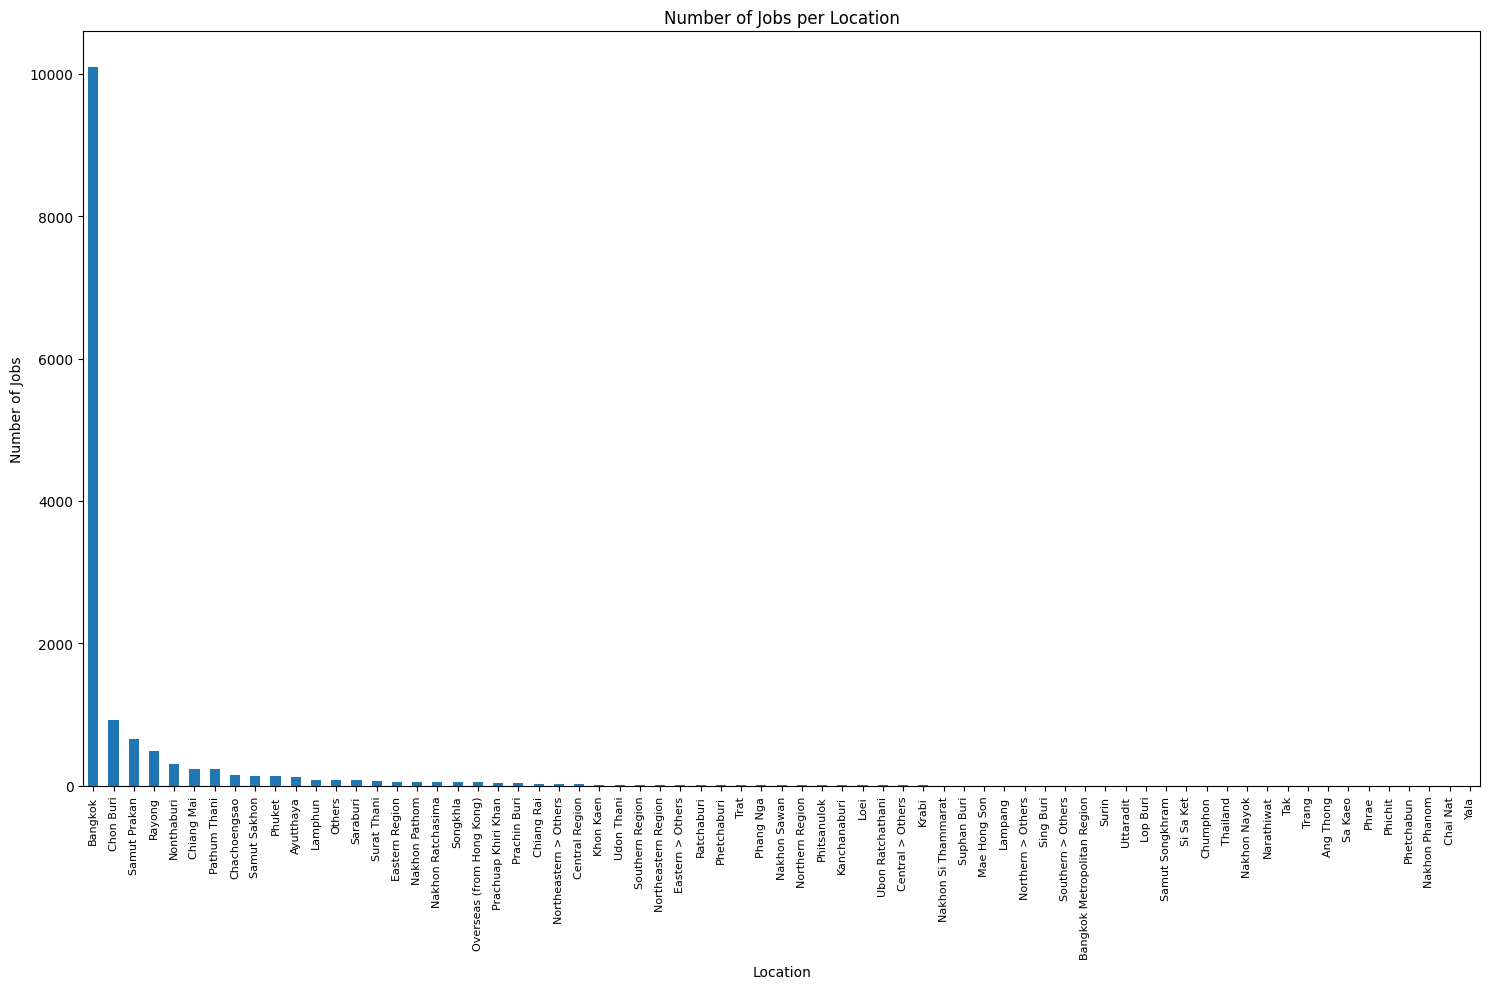

In [8]:
plt.figure(figsize=(15, 10)) 
job_counts.plot(kind='bar')
plt.title('Number of Jobs per Location')
plt.xlabel('Location')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=90, fontsize=8) 
plt.tight_layout() 
plt.show()

In [9]:
df_tag = df.groupby(by=['Tag']).count().reset_index()
df_tag.sort_values(by='Job_Position', ascending=False, inplace=True)

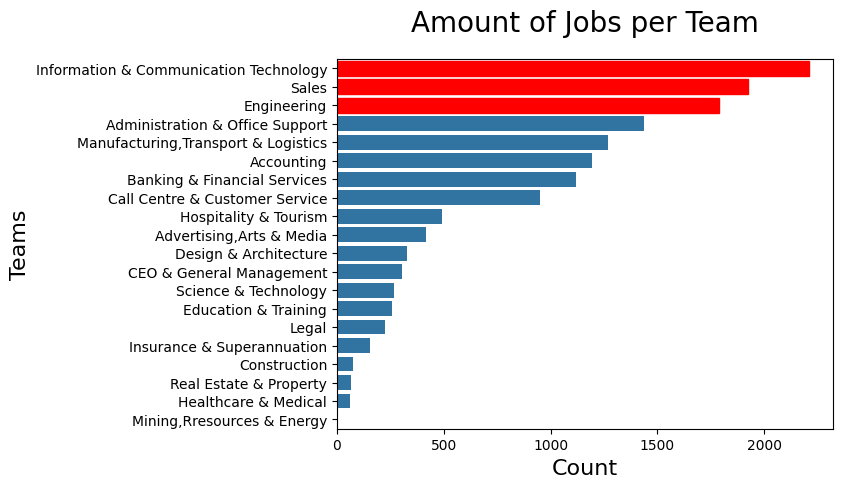

In [10]:
ax = sns.barplot(data=df_tag, x='Job_Position', y='Tag')

for bar in ax.patches:
    if bar.get_y() < 2:
        bar.set_color('red')  

#Labels
plt.xlabel('Count', fontsize=16)
plt.ylabel('Teams', fontsize=16)
plt.title('Amount of Jobs per Team', fontsize=20, pad=20);

In [11]:
df['Job_Description'] = df['Job_Description'].apply(lambda x : re.sub('\\\n',' ', x))
df['R_word_count'] = df['Job_Description'].apply(lambda x : len(x.split()))
df['R_char_count'] = df['Job_Description'].apply(lambda x : len(x.replace(' ','')))
df['R_punc_count'] = df['Job_Description'].apply(lambda x : len([a for a in x if a in string.punctuation]))
                                                           
df_stats_raw = df[['Job_Position','R_word_count','R_char_count','R_punc_count']]
df_stats_raw

Job_Position  R_word_count  \
0                    Financial Accounting & Reporting           108   
1                                            Taxation           513   
2                  Accounts Receivable/Credit Control           269   
3              Business Services & Corporate Advisory           262   
4                                            Taxation           264   
...                                               ...           ...   
14536                        Food Technology & Safety           184   
14537                        Food Technology & Safety            89   
14538  Mathematics, Statistics & Information Sciences           504   
14539                        Food Technology & Safety           365   
14540                        Biotechnology & Genetics             1   

       R_char_count  R_punc_count  
0              1490            27  
1              2969            99  
2              1579            12  
3              1531            17  
4              1523            28  
...             ...           ...  
14536          1053            46  
14537          1327            13  
14538          3039            88  
14539          2319            88  
14540            39             0  

[14541 rows x 4 columns]

In [12]:
df['Job_Description_Cleaned'] = df['Job_Description']

In [13]:
# ## Lower case
# df['Job_description_cleaned'] = df['Job_description_cleaned'].apply(lambda x: " ".join(x.lower()for x in x.split()))
# ## remove tabulation and punctuation
# df['Job_description_cleaned'] = df['Job_description_cleaned'].str.replace('[^\w\s]',' ')
# ## digits
# df['Job_description_cleaned'] = df['Job_description_cleaned'].str.replace('\d+', '')

# #remove stop words
# stop = stopwords.words('english')
# df['Job_description_cleaned'] = df['Job_description_cleaned'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# ## lemmatization
# df['Job_description_cleaned'] = df['Job_description_cleaned'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

# print("Preprocessed data: \n")
# df.head()

In [14]:
## Lower case
df['Job_Description_Cleaned'] = df['Job_Description_Cleaned'].apply(lambda x: " ".join(x.lower() for x in x.split()))

## Remove tabulation, punctuation and handle Thai characters
df['Job_Description_Cleaned'] = df['Job_Description_Cleaned'].str.replace('[^\w\sก-๙]', ' ', regex=True)

## Digits
df['Job_Description_Cleaned'] = df['Job_Description_Cleaned'].str.replace('\d+', '', regex=True)

## Remove stop words (English and Thai)
stop_words = set(stopwords.words('english')).union(set(thai_stopwords()))
df['Job_Description_Cleaned'] = df['Job_Description_Cleaned'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

## English Lemmatization
df['Job_Description_Cleaned'] = df['Job_Description_Cleaned'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

## Tokenization for Thai Language (if needed)
# df['Job_description_cleaned'] = df['Job_description_cleaned'].apply(lambda x: " ".join(word_tokenize(x, engine='newmm')))

print("Preprocessed data: \n")
df.head()

<>:5: SyntaxWarning: invalid escape sequence '\w'
<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\w'
<>:8: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Tokyo\AppData\Local\Temp\ipykernel_17212\2863076896.py:5: SyntaxWarning: invalid escape sequence '\w'
  df['Job_Description_Cleaned'] = df['Job_Description_Cleaned'].str.replace('[^\w\sก-๙]', ' ', regex=True)
C:\Users\Tokyo\AppData\Local\Temp\ipykernel_17212\2863076896.py:8: SyntaxWarning: invalid escape sequence '\d'
  df['Job_Description_Cleaned'] = df['Job_Description_Cleaned'].str.replace('\d+', '', regex=True)


Preprocessed data: 



Job_Title  \
0                       GL Account Assistant Manager   
1                                      Tax Associate   
2  Accounts Receivable Supervisor/หัวหน้าหน่วยบัญ...   
3                       Assistant Accounting Manager   
4       Assistant Tax Manager - M&A and tax advisory   

                           Company Location  \
0            MEGA CLINIC Co., Ltd.  Bangkok   
1  PKF Holdings (Thailand) Limited  Bangkok   
2  Sodexo Services (Thailand) Ltd.  Bangkok   
3   Mazars Holding (Thailand) Ltd.  Bangkok   
4   Mazars Holding (Thailand) Ltd.  Bangkok   

                             Job_Position   Job_Type  Salary Min  Salary Max  \
0        Financial Accounting & Reporting  Full time     36000.0     53000.0   
1                                Taxation  Full time         NaN         NaN   
2      Accounts Receivable/Credit Control  Full time         NaN         NaN   
3  Business Services & Corporate Advisory  Full time         NaN         NaN   
4                                Taxation  Full time         NaN         NaN   

                                     Job_Description         Tag Language  \
0  About us ร่วมเป็นส่วนหนึ่งกับทีม MEGA CLINIC M...  Accounting       th   
1  Position Summary This position is for a lawyer...  Accounting       en   
2  Reports To: FINANCE MANAGER Key Result Areas: ...  Accounting       en   
3  Job Description Prepare management reports for...  Accounting       en   
4  Job Description: The ideal candidate will be a...  Accounting       en   

   R_word_count  R_char_count  R_punc_count  \
0           108          1490            27   
1           513          2969            99   
2           269          1579            12   
3           262          1531            17   
4           264          1523            28   

                             Job_Description_Cleaned  
0  u ร่วมเป็นส่วนหนึ่งกับทีม mega clinic mega cli...  
1  position summary position lawyer assist client...  
2  report finance manager key result area positio...  
3  job description prepare management report use ...  
4  job description ideal candidate assigned work ...

In [15]:
## Define your custom stop words here
custom_stop_words = {'Job', 'description', 'qualification'}

## Remove stop words (English, Thai, and Custom)
stop_words = set(stopwords.words('english')).union(set(thai_stopwords())).union(custom_stop_words)
df['Job_Description_Cleaned'] = df['Job_Description_Cleaned'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))


In [16]:
df['Job_Description'] = df['Job_Description_Cleaned'].apply(lambda x : re.sub('\\\n',' ', x))
df['C_word_count'] = df['Job_Description_Cleaned'].apply(lambda x : len(x.split()))
df['C_char_count'] = df['Job_Description_Cleaned'].apply(lambda x : len(x.replace(' ','')))
df['C_punc_count'] = df['Job_Description_Cleaned'].apply(lambda x : len([a for a in x if a in string.punctuation]))

df_stats_clean = df[['Job_Position','C_word_count','C_char_count','C_punc_count']]
df_stats_clean

Job_Position  C_word_count  \
0                    Financial Accounting & Reporting            89   
1                                            Taxation           341   
2                  Accounts Receivable/Credit Control           190   
3              Business Services & Corporate Advisory           171   
4                                            Taxation           176   
...                                               ...           ...   
14536                        Food Technology & Safety           115   
14537                        Food Technology & Safety            82   
14538  Mathematics, Statistics & Information Sciences           341   
14539                        Food Technology & Safety           268   
14540                        Biotechnology & Genetics             1   

       C_char_count  C_punc_count  
0              1391             0  
1              2264             0  
2              1306             0  
3              1212             0  
4              1210             0  
...             ...           ...  
14536           818             0  
14537          1279             0  
14538          2432             0  
14539          1885             0  
14540            39             0  

[14541 rows x 4 columns]

In [17]:
df.head()

Job_Title  \
0                       GL Account Assistant Manager   
1                                      Tax Associate   
2  Accounts Receivable Supervisor/หัวหน้าหน่วยบัญ...   
3                       Assistant Accounting Manager   
4       Assistant Tax Manager - M&A and tax advisory   

                           Company Location  \
0            MEGA CLINIC Co., Ltd.  Bangkok   
1  PKF Holdings (Thailand) Limited  Bangkok   
2  Sodexo Services (Thailand) Ltd.  Bangkok   
3   Mazars Holding (Thailand) Ltd.  Bangkok   
4   Mazars Holding (Thailand) Ltd.  Bangkok   

                             Job_Position   Job_Type  Salary Min  Salary Max  \
0        Financial Accounting & Reporting  Full time     36000.0     53000.0   
1                                Taxation  Full time         NaN         NaN   
2      Accounts Receivable/Credit Control  Full time         NaN         NaN   
3  Business Services & Corporate Advisory  Full time         NaN         NaN   
4                                Taxation  Full time         NaN         NaN   

                                     Job_Description         Tag Language  \
0  u ร่วมเป็นส่วนหนึ่งกับทีม mega clinic mega cli...  Accounting       th   
1  position summary position lawyer assist client...  Accounting       en   
2  report finance manager key result area positio...  Accounting       en   
3  job prepare management report use client manag...  Accounting       en   
4  job ideal candidate assigned work young dynami...  Accounting       en   

   R_word_count  R_char_count  R_punc_count  \
0           108          1490            27   
1           513          2969            99   
2           269          1579            12   
3           262          1531            17   
4           264          1523            28   

                             Job_Description_Cleaned  C_word_count  \
0  u ร่วมเป็นส่วนหนึ่งกับทีม mega clinic mega cli...            89   
1  position summary position lawyer assist client...           341   
2  report finance manager key result area positio...           190   
3  job prepare management report use client manag...           171   
4  job ideal candidate assigned work young dynami...           176   

   C_char_count  C_punc_count  
0          1391             0  
1          2264             0  
2          1306             0  
3          1212             0  
4          1210             0

Text(0.5, 1.0, 'Word Count of Job Descriptions')

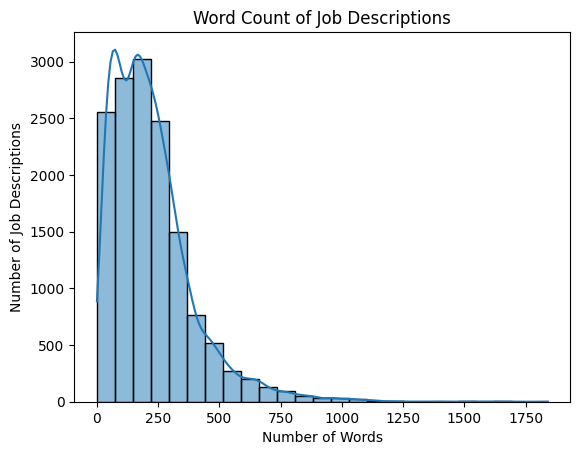

In [18]:
sns.histplot(data=df_stats_raw, x='R_word_count', bins=25, kde=True)
plt.xlabel('Number of Words')
plt.ylabel('Number of Job Descriptions')
plt.title('Word Count of Job Descriptions')

Text(0.5, 1.0, 'Charecters Count of Job Descriptions')

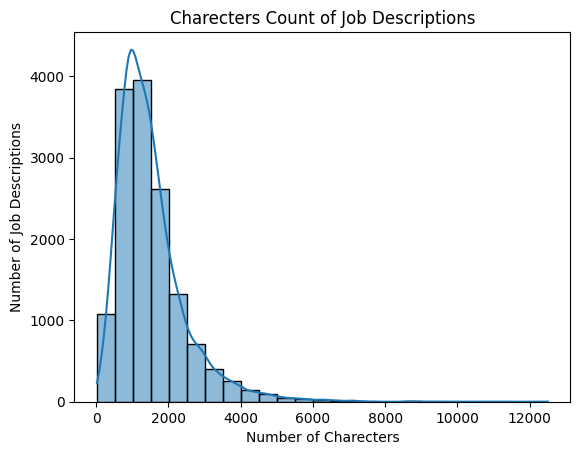

In [19]:
sns.histplot(data=df_stats_raw, x='R_char_count', bins=25, kde=True)
plt.xlabel('Number of Charecters')
plt.ylabel('Number of Job Descriptions')
plt.title('Charecters Count of Job Descriptions')

Text(0.5, 1.0, 'Word Count of Job Descriptions Cleaned')

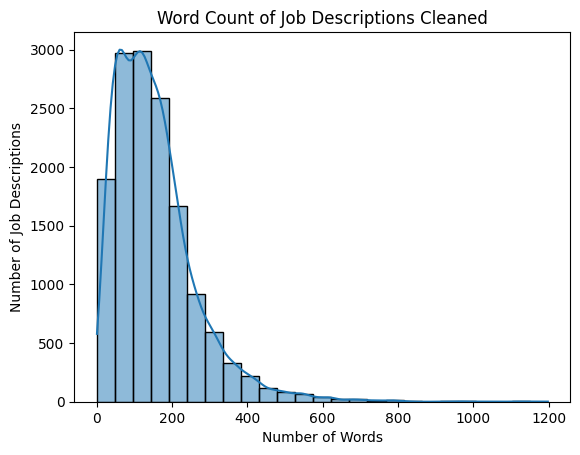

In [20]:
sns.histplot(data=df_stats_clean, x='C_word_count', bins=25, kde=True)
plt.xlabel('Number of Words')
plt.ylabel('Number of Job Descriptions')
plt.title('Word Count of Job Descriptions Cleaned')

Text(0.5, 1.0, 'Charecters Count of Job Descriptions Clean')

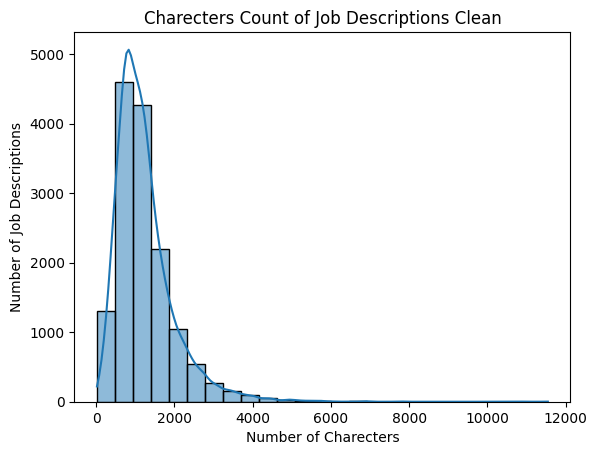

In [21]:
sns.histplot(data=df_stats_clean, x='C_char_count', bins=25, kde=True)
plt.xlabel('Number of Charecters')
plt.ylabel('Number of Job Descriptions')
plt.title('Charecters Count of Job Descriptions Clean')

In [22]:
text = df.Job_Description[1]

In [84]:
descriptions = ''.join(d for d in df['Job_Description_Cleaned']) #Looping over all cells in Job Description column and joining then together
print ('There are {} words in the combined data-related job descriptions.'.format(len(descriptions))) #Printing results

There are 20401035 words in the combined data-related job descriptions.


In [85]:
word_count = dict(Counter(descriptions.split()))
print('Without ranking the first 10 words look like: {}'.format(dict(itertools.islice(word_count.items(), 10))))

Without ranking the first 10 words look like: {'u': 4344, 'ร่วมเป็นส่วนหนึ่งกับทีม': 1, 'mega': 27, 'clinic': 138, 'เป็นคลินิกเวชกรรมประเภทเสริมความงามที่มีมาตรฐานและการบริการระดับสากล': 1, 'ในปัจจุบัน': 5, 'มีสาขาทั้งหมด': 1, 'สาขา': 553, 'สยามสแควร์': 3, 'เซ็นทรัลลาดพร้าว': 2}


In [86]:
words_popular = {k: v for k, v in sorted(word_count.items(), key=lambda item: item[1], reverse=True)} 
print('With ranking the first 10 words look like: {}'.format(dict(itertools.islice(words_popular.items(), 10))))

With ranking the first 10 words look like: {'experience': 21500, 'team': 17488, 'business': 16630, 'skill': 15996, 'work': 15934, 'management': 14807, 'customer': 14793, 'sale': 12622, 'year': 11668, 'related': 11108}


In [91]:
words_all_jobs = pd.DataFrame.from_dict(words_popular, orient='index',columns=['Count']).reset_index() #(5) Create our cleaned dataframe
words_all_jobs.head(20)

index  Count
0   experience  21500
1         team  17488
2     business  16630
3        skill  15996
4         work  15934
5   management  14807
6     customer  14793
7         sale  12622
8         year  11668
9      related  11108
10     project  10915
11        good  10858
12     company  10691
13     product  10656
14     service  10232
15     support   9693
16     process   9625
17        data   9149
18      ensure   9139
19      degree   8872

In [27]:
words_all_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100233 entries, 0 to 100232
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   index   100233 non-null  object
 1   Count   100233 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


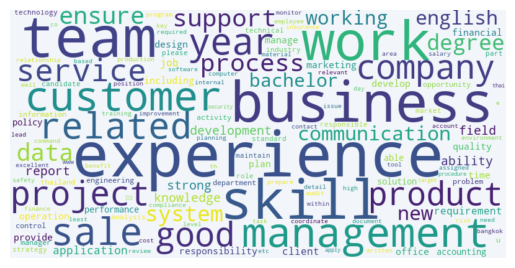

In [28]:
wordcloud = WordCloud(min_font_size=8, max_font_size=100, max_words=500, width=800, height=400,prefer_horizontal=1, background_color='#f2f6fa').generate_from_frequencies(words_popular) #Generate wordcloud class from dictionary

plt.imshow(wordcloud.recolor(), interpolation='bilinear')
plt.axis('off')
plt.show();

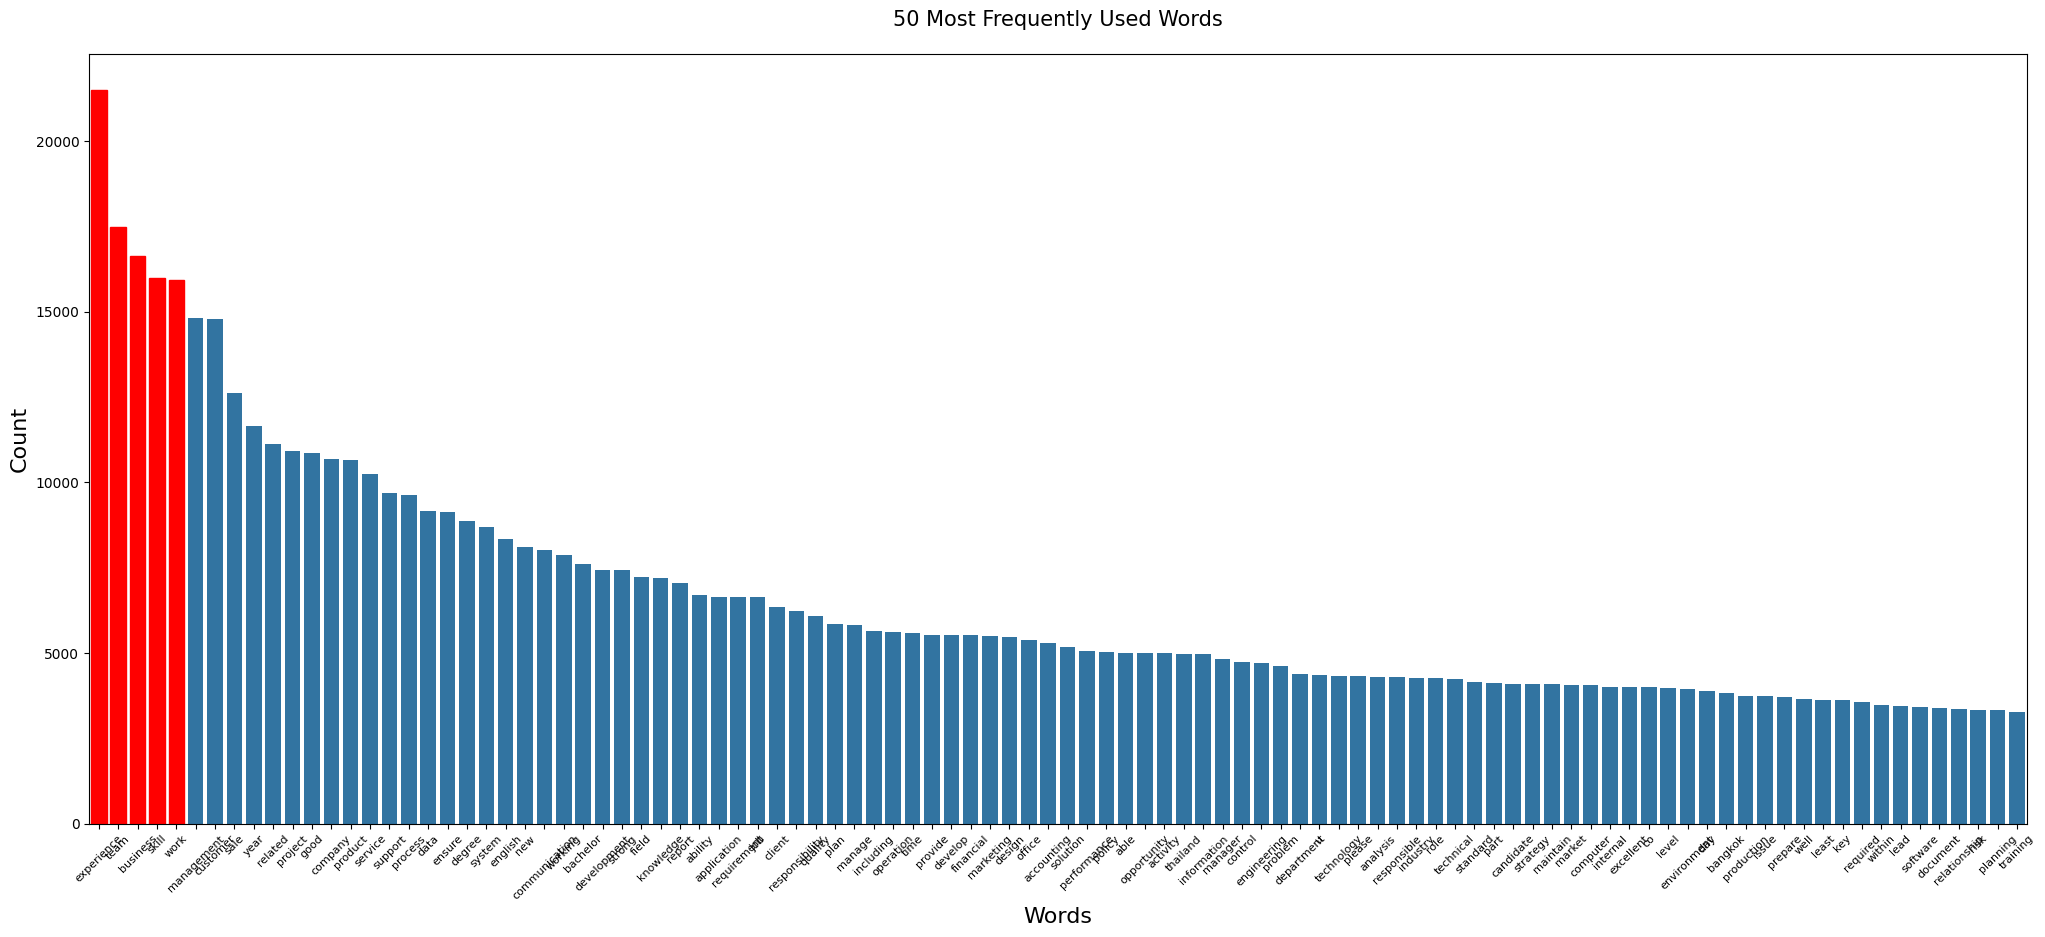

In [29]:
fig, ax = plt.subplots(figsize=(25, 10))
ax = sns.barplot(data=words_all_jobs[:50],x='index',y='Count')

for bar in ax.patches:
    if bar.get_x() < 4:
        bar.set_color('red')
plt.xticks(rotation=45, fontsize=8) 
plt.xlabel('Words', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('50 Most Frequently Used Words', fontsize=15, pad=20);

In [83]:
words_all_jobs['Ratio_Listings']= words_all_jobs['Count']/df.shape[0]
words_all_jobs.head(5)

NameError: name 'words_all_jobs' is not defined

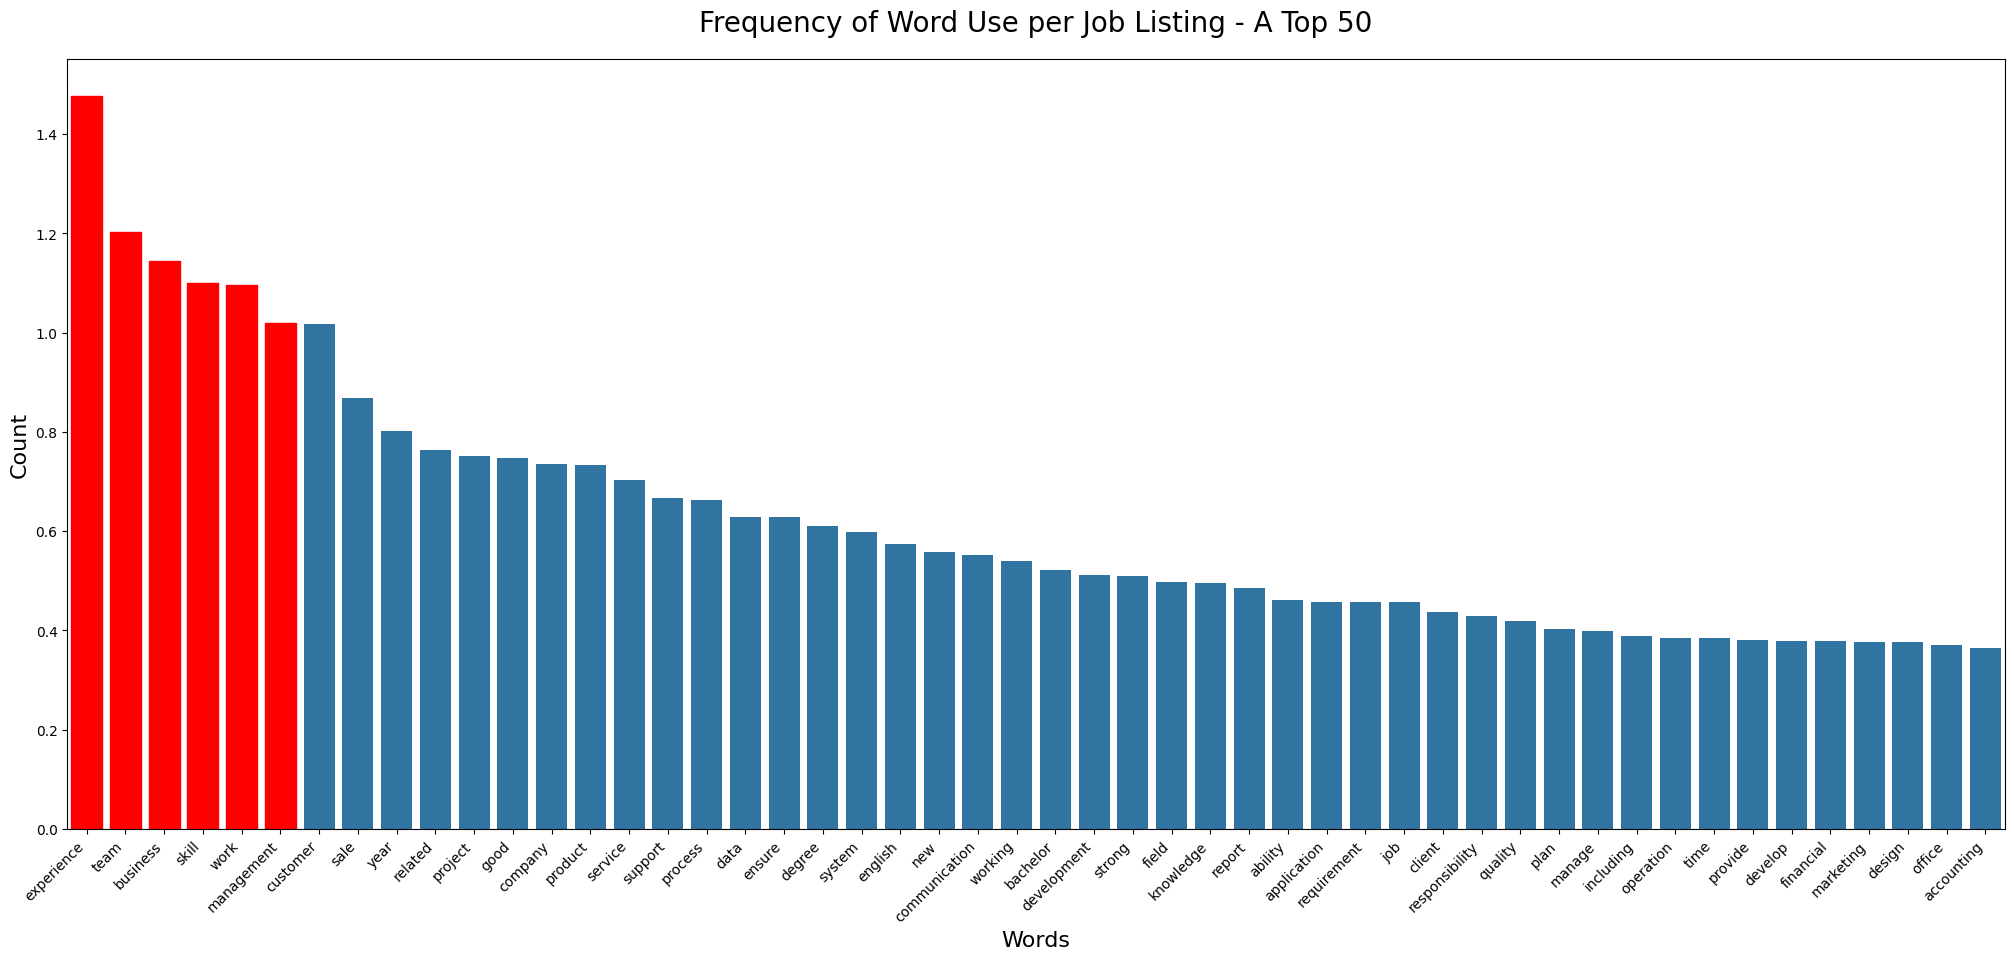

In [31]:
fig, ax = plt.subplots(figsize=(25, 10))
ax = sns.barplot(data=words_all_jobs[:50],x='index',y='Ratio_Listings')

for bar in ax.patches:
    if bar.get_x() < 5:
        bar.set_color('red')    

plt.xticks(rotation = 45, ha= 'right')
plt.xlabel('Words', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Frequency of Word Use per Job Listing - A Top 50', fontsize=20, pad=20);

In [33]:
first_10_rows = words_all_jobs['index'].head(30).tolist()
my_list = []
for item in first_10_rows:
    my_list.append(item)
print(my_list)


['experience', 'team', 'business', 'skill', 'work', 'management', 'customer', 'sale', 'year', 'related', 'project', 'good', 'company', 'product', 'service', 'support', 'process', 'data', 'ensure', 'degree', 'system', 'english', 'new', 'communication', 'working', 'bachelor', 'development', 'strong', 'field', 'knowledge']


In [2]:
df = pd.read_csv ('data_tag/datatestv5.2.csv')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14541 entries, 0 to 14540
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Job_Title                14541 non-null  object 
 1   Company                  14541 non-null  object 
 2   Location                 14541 non-null  object 
 3   Job_Position             14541 non-null  object 
 4   Job_Type                 14541 non-null  object 
 5   Salary Min               1894 non-null   float64
 6   Salary Max               1894 non-null   float64
 7   Job_Description          14541 non-null  object 
 8   Tag                      14541 non-null  object 
 9   Language                 14541 non-null  object 
 10  R_sentence_count         14541 non-null  int64  
 11  R_word_count             14541 non-null  int64  
 12  R_char_count             14541 non-null  int64  
 13  R_punc_count             14541 non-null  int64  
 14  Job_Description_Cleane

In [63]:
unique_position = []
for u in df['Job_Position'].unique():
    unique_position.append(u)
len(unique_position)

158

In [64]:
for u in df['Job_Position'].unique():
    print(u)

Financial Accounting & Reporting
Taxation
Accounts Receivable/Credit Control
Business Services & Corporate Advisory
Accounts Officers/Clerks
Assistant Accountants
Analysis & Reporting
Other
Management Accounting & Budgeting
Audit - Internal
Audit - External
Residential Leasing & Property Management
Financial Managers & Controllers
PA, EA & Secretarial
Training & Development
Administrative Assistants
Client & Sales Administration
Consulting & Generalist HR
Sales Coordinators
Recruitment - Internal
Office Management
Sales Representatives/Consultants
Account & Relationship Management
Art Direction
Media Strategy, Planning & Buying
Journalism & Writing
Programming & Production
Agency Account Management
Editing & Publishing
Photography
Management
Graphic Design
Marketing Communications
Corporate Finance & Investment Banking
Banking - Corporate & Institutional
Compliance & Risk
Credit
Banking - Business
Supervisors/Team Leaders
Funds Management
Settlements
Banking - Retail/Branch
Treasury
St

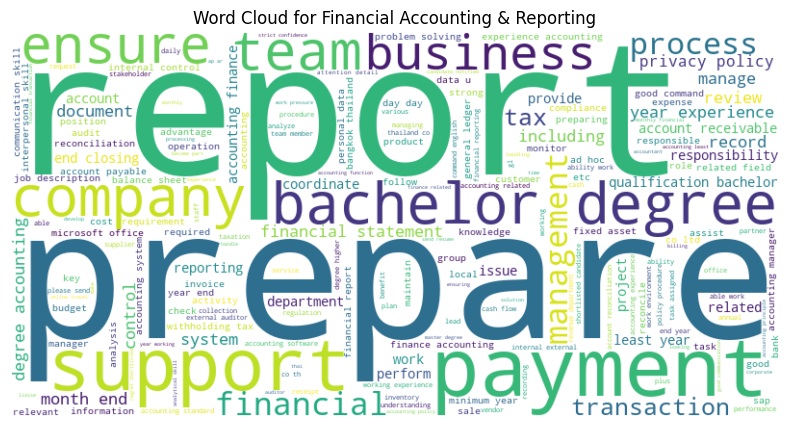

In [65]:
def generate_word_cloud(df, job_position_type):
    # Filter the dataframe by job position type
    df_filtered = df[df['Job_Position'] == job_position_type]

    # Combine job descriptions into a single text
    text = ' '.join(df_filtered['Job_Description_Cleaned'])

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {job_position_type}')
    plt.axis('off')
    plt.show()

generate_word_cloud(df, 'Financial Accounting & Reporting')


In [66]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

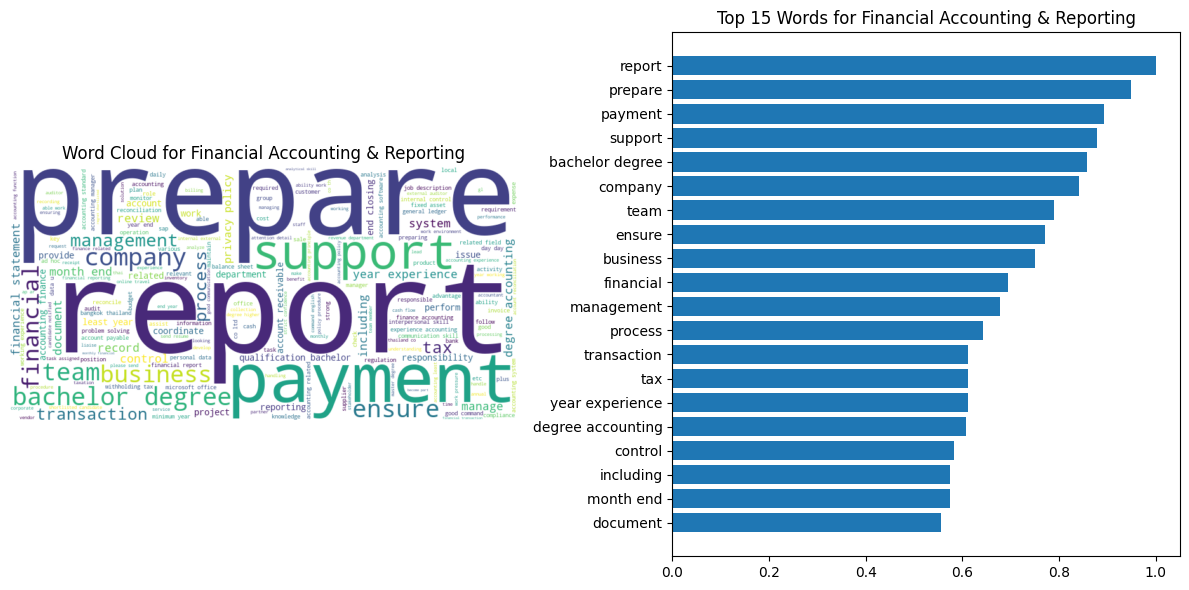

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Define the generate_word_cloud function
def generate_word_cloud(df, job_position_type):
    # Filter the dataframe by job position type
    df_filtered = df[df['Job_Position'] == job_position_type]

    # Combine job descriptions into a single text
    text = ' '.join(df_filtered['Job_Description_Cleaned'])

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Extract the top 15 words from the WordCloud
    top_words = sorted(wordcloud.words_.items(), key=lambda x: x[1], reverse=True)[:20]

    # Display the WordCloud
    plt.figure(figsize=(12, 6))

    # Subplot for the WordCloud
    plt.subplot(121)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {job_position_type}')
    plt.axis('off')

    # Subplot for the top 15 words
    plt.subplot(122)
    top_words_dict = dict(top_words)
    plt.barh(range(len(top_words_dict)), top_words_dict.values())
    plt.yticks(range(len(top_words_dict)), top_words_dict.keys())
    plt.title(f'Top 15 Words for {job_position_type}')
    plt.gca().invert_yaxis()

    plt.tight_layout()
    plt.show()

# Example usage:
generate_word_cloud(df, 'Financial Accounting & Reporting')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pythainlp
from pythainlp.tokenize import word_tokenize

# Define a function to generate word cloud and create skills dictionary
def generate_word_cloud_and_skills(df):
    skills_dict = {}
    
    for job_position_type in df['Job_Position'].unique():
        # Filter the dataframe by job position type
        df_filtered = df[df['Job_Position'] == job_position_type]

        # Combine job descriptions into a single Thai text
        thai_text = ' '.join(df_filtered['Job_Description_Cleaned'])

        # Tokenize Thai text
        tokens = word_tokenize(thai_text)

        # Join the tokens into a single string
        thai_text = " ".join(tokens)

        # Create a WordCloud object
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(thai_text)

        # Extract the top 15 words from the WordCloud
        top_words = sorted(wordcloud.words_.items(), key=lambda x: x[1], reverse=True)[:15]

        # Extract the top words as a list
        top_words_list = [word for word, _ in top_words]

        # Add the top words to the skills_dict
        skills_dict[job_position_type] = top_words_list

        # Display the WordCloud
        plt.figure(figsize=(12, 6))

        # Subplot for the WordCloud
        plt.subplot(121)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud for {job_position_type}')
        plt.axis('off')

        # Subplot for the top 15 words
        plt.subplot(122)
        top_words_dict = dict(top_words)
        plt.barh(range(len(top_words_dict)), top_words_dict.values())
        plt.yticks(range(len(top_words_dict)), top_words_dict.keys())
        plt.title(f'Top 15 Words for {job_position_type}')
        plt.gca().invert_yaxis()

        plt.tight_layout()
        plt.show()

    return skills_dict

# Generate word clouds and skills dictionary for Thai text
skills_dict = generate_word_cloud_and_skills(df)

# Print the resulting skills dictionary
print(skills_dict)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re


# Define custom stopwords
custom_stopwords = set([
    'in', 'this', 'and', 'are', 'is', 'for', 'you', 'will', 'our', 'a', 'the', 'to', 'of', 'an', 'with', 'as', 'by', 'your',
    'also', 'be', 'key', 'that', 'or', 'it', 'on', 'team', 'experience', 'like', 'and', 'skills'
])

# Define a function to generate word cloud and create skills dictionary
def generate_word_cloud_and_skills(df):
    skills_dict = {}
    
    for job_position_type in df['Job_Position'].unique():
        # Filter the dataframe by job position type
        df_filtered = df[df['Job_Position'] == job_position_type]

        # Combine job descriptions into a single English text
        english_text = ' '.join(df_filtered['Job_Description_Cleaned'])

        # Perform text preprocessing: Remove special characters, numbers, and extra spaces
        english_text = re.sub(r'[^a-zA-Z\s]', '', english_text)
        english_text = re.sub(r'\s+', ' ', english_text).strip()

        # Check if there is at least one valid word to create a word cloud
        if english_text:
            # Create a WordCloud object with custom stopwords
            wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=custom_stopwords).generate(english_text)

            # Extract the top 15 words from the WordCloud
            top_words = sorted(wordcloud.words_.items(), key=lambda x: x[1], reverse=True)[:15]

            # Extract the top words as a list
            top_words_list = [word for word, _ in top_words]

            # Add the top words to the skills_dict
            skills_dict[job_position_type] = top_words_list

            # Display the WordCloud
            plt.figure(figsize=(12, 6))

            # Subplot for the WordCloud
            plt.subplot(121)
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.title(f'Word Cloud for {job_position_type}')
            plt.axis('off')

            # Subplot for the top 15 words
            plt.subplot(122)
            top_words_dict = dict(top_words)
            plt.barh(range(len(top_words_dict)), top_words_dict.values())
            plt.yticks(range(len(top_words_dict)), top_words_dict.keys())
            plt.title(f'Top 15 Words for {job_position_type}')
            plt.gca().invert_yaxis()

            plt.tight_layout()
            plt.show()

    return skills_dict

# Generate word clouds and skills dictionary for English text with text preprocessing and custom stopwords
skills_dict = generate_word_cloud_and_skills(df)

# Print the resulting skills dictionary
print(skills_dict)


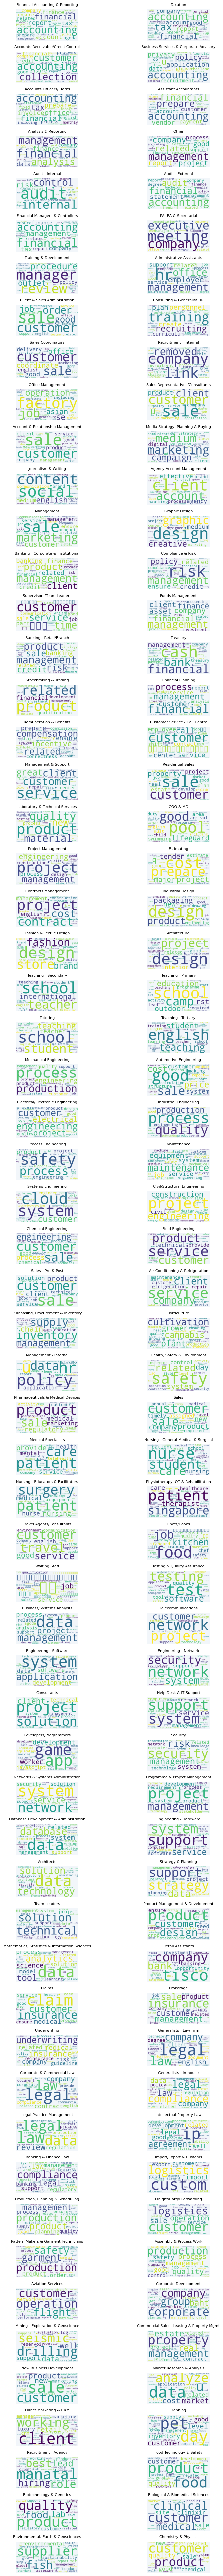

{'Financial Accounting & Reporting': ['accounting', 'financial', 'report', 'account', 'tax', 'finance', 'company', 'related', 'ensure', 'prepare', 'agoda', 'management', 'payment', 'process', 'good', 'degree', 'end', 'policy', 'transaction', 'control'], 'Taxation': ['accounting', 'tax', 'financial', 'report', 'account', 'company', 'good', 'prepare', 'english', 'related', 'degree', 'monthly', 'knowledge', 'management', 'qualification', 'bachelor', 'office', 'job', 'responsibility', 'working'], 'Accounts Receivable/Credit Control': ['accounting', 'collection', 'customer', 'financial', 'credit', 'ensure', 'good', 'process', 'company', 'report', 'job', 'finance', 'related', 'management', 'payment', 'monthly', 'policy', 'degree', 'control', 'cost'], 'Business Services & Corporate Advisory': ['accounting', 'u', 'policy', 'application', 'privacy', 'data', 'recruitment', 'please', 'co', 'thailand', 'financial', 'th', 'report', 'personal', 'persolkelly', 'job', 'connection', 'sathorn', 'service

In [93]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from langdetect import detect

def generate_word_clouds_for_skills(df, skills_dict):
    fig = plt.figure(figsize=(8, 100))
    count = 1

    # Define stopwords to exclude from the word clouds
    stopwords_to_exclude = {'experience', 'team', 'skill', 'business', 'work', 'year'}

    # Initialize an empty skills dictionary to store top words for each job position
    skills_top_words_dict = {}

    for key in skills_dict.keys():
        descriptions = ' '.join(d for d in df[df['Job_Position'] == key]['Job_Description_Cleaned'])

        # Filter out non-English text using langdetect
        try:
            if detect(descriptions) == 'en':
                word_count = dict(Counter(descriptions.split()))  # Creating a dictionary of all words in split description

                # Creating dictionary by most popular words by looping over our split descriptions dictionary
                words_popular = {k: v for k, v in sorted(word_count.items(), key=lambda item: item[1], reverse=True)}

                # Removing stopwords
                words_popular = {k: v for k, v in words_popular.items() if k not in stopwords_to_exclude}

                wordcloud = WordCloud(min_font_size=8, max_font_size=100, max_words=500, prefer_horizontal=1, background_color='#f2f6fa').generate_from_frequencies(words_popular)  # Generate wordcloud class from dictionary

                ax = plt.subplot(79, 2, count)

                plt.imshow(wordcloud, interpolation='bilinear')
                plt.title(key, fontsize=8, pad=8)

                ax.imshow(wordcloud)
                ax.axis('off')

                count += 1

                # Extract and store the top words in the skills dictionary
                top_words = sorted(wordcloud.words_.items(), key=lambda x: x[1], reverse=True)[:20]  # Adjust the number of top words as needed
                top_words_list = [word for word, _ in top_words]
                skills_top_words_dict[key] = top_words_list
        except:
            pass

    plt.tight_layout(pad=1.0, h_pad=1.0, w_pad=1.0)
    plt.show()

    # Return the skills dictionary with top words
    return skills_top_words_dict

# Call the function to generate word clouds for each job position type and create the skills dictionary
skills_top_words_dict = generate_word_clouds_for_skills(df, skills_dict)

# Print the resulting skills dictionary with top words
print(skills_top_words_dict)


In [94]:
s = {'Financial Accounting & Reporting': ['accounting', 'financial', 'report', 'account', 'tax', 'finance', 'company', 'related', 'ensure', 'prepare', 'agoda', 'management', 'payment', 'process', 'good', 'degree', 'end', 'policy', 'transaction', 'control'], 'Taxation': ['accounting', 'tax', 'financial', 'report', 'account', 'company', 'good', 'prepare', 'english', 'related', 'degree', 'monthly', 'knowledge', 'management', 'qualification', 'bachelor', 'office', 'job', 'responsibility', 'working'], 'Accounts Receivable/Credit Control': ['accounting', 'collection', 'customer', 'financial', 'credit', 'ensure', 'good', 'process', 'company', 'report', 'job', 'finance', 'related', 'management', 'payment', 'monthly', 'policy', 'degree', 'control', 'cost'], 'Business Services & Corporate Advisory': ['accounting', 'u', 'policy', 'application', 'privacy', 'data', 'recruitment', 'please', 'co', 'thailand', 'financial', 'th', 'report', 'personal', 'persolkelly', 'job', 'connection', 'sathorn', 'service', 'english'], 'Accounts Officers/Clerks': ['accounting', 'financial', 'tax', 'office', 'prepare', 'invoice', 'english', 'process', 'monthly', 'including', 'fixed', 'statement', 'manage', 'payment', 'document', 'bachelor', 'degree', 'computer', 'salary', 'bangkok'], 'Assistant Accountants': ['accounting', 'prepare', 'financial', 'vendor', 'payment', 'customer', 'account', 'transaction', 'related', 'management', 'description', 'process', 'invoice', 'ensure', 'incoming', 'reconcile', 'internal', 'required', 'finance', 'field'], 'Analysis & Reporting': ['financial', 'management', 'analysis', 'finance', 'data', 'company', 'accounting', 'project', 'related', 'good', 'support', 'report', 'qualification', 'degree', 'strong', 'job', 'investment', 'bachelor', 'english', 'ensure'], 'Other': ['management', 'related', 'company', 'project', 'good', 'report', 'process', 'support', 'accounting', 'ensure', 'financial', 'communication', 'sale', 'customer', 'system', 'english', 'degree', 'job', 'strong', 'bachelor'], 'Audit - Internal': ['audit', 'internal', 'control', 'risk', 'management', 'accounting', 'process', 'report', 'good', 'related', 'ensure', 'plan', 'financial', 'policy', 'company', 'prepare', 'english', 'compliance', 'review', 'degree'], 'Audit - External': ['accounting', 'financial', 'audit', 'statement', 'management', 'company', 'degree', 'report', 'finance', 'standard', 'related', 'bachelor', 'english', 'policy', 'good', 'prepare', 'u', 'responsibility', 'strong', 'qualification'], 'Financial Managers & Controllers': ['financial', 'accounting', 'management', 'tax', 'company', 'finance', 'report', 'ensure', 'related', 'compliance', 'reporting', 'analysis', 'control', 'cash', 'monthly', 'good', 'managing', 'regulation', 'including', 'activity'], 'PA, EA & Secretarial': ['meeting', 'company', 'executive', 'support', 'management', 'task', 'office', 'communication', 'related', 'document', 'good', 'english', 'report', 'job', 'degree', 'ability', 'information', 'including', 'qualification', 'bachelor'], 'Training & Development': ['manager', 'review', 'procedure', 'outlet', 'policy', 'department', 'ensure', 'restaurant', 'f', 'b', 'resort', 'standard', 'management', 'service', 'operational', 'guest', 'sale', 'personnel', 'training', 'product'], 'Administrative Assistants': ['hr', 'management', 'office', 'employee', 'support', 'related', 'service', 'company', 'job', 'good', 'process', 'english', 'communication', 'qualification', 'data', 'degree', 'responsibility', 'ensure', 'bachelor', 'ปี'], 'Client & Sales Administration': ['sale', 'customer', 'order', 'good', 'job', 'support', 'english', 'service', 'office', 'degree', 'related', 'document', 'bachelor', 'company', 'communication', 'management', 'delivery', 'coordinate', 'client', 'product'], 'Consulting & Generalist HR': ['training', 'recruiting', 'personnel', 'plan', 'create', 'curriculum', 'coordination', 'human', 'management', 'prepare', 'manpower', 'carry', 'interviewing', 'selecting', 'survey', 'short', 'medium', 'long', 'term', 'check'], 'Sales Coordinators': ['customer', 'sale', 'coordinate', 'office', 'good', 'delivery', 'english', 'marketing', 'job', 'keep', 'service', 'process', 'description', 'new', 'client', 'qualification', 'bachelor', 'field', 'word', 'excel'], 'Recruitment - Internal': ['company', 'link', 'removed', 'recruitment', 'talent', 'role', 'challenge', 'grow', 'process', 'care', 'acquisition', 'initiative', 'strong', 'increase', 'day', 'office', 'technology', 'partner', 'nimble', 'right'], 'Office Management': ['factory', 'job', 'operation', 'se', 'asian', 'including', 'procedure', 'function', 'day', 'coordinate', 'hong', 'kong', 'footwear', 'human', 'resource', 'etc', 'production', 'report', 'plus', 'round'], 'Sales Representatives/Consultants': ['sale', 'customer', 'client', 'u', 'product', 'company', 'marketing', 'job', 'new', 'application', 'policy', 'service', 'degree', 'thailand', 'responsibility', 'market', 'support', 'ensure', 'manage', 'relationship'], 'Account & Relationship Management': ['sale', 'customer', 'product', 'client', 'service', 'company', 'new', 'management', 'good', 'opportunity', 'marketing', 'market', 'relationship', 'job', 'strong', 'plan', 'related', 'develop', 'target', 'communication'], 'Media Strategy, Planning & Buying': ['marketing', 'medium', 'campaign', 'digital', 'client', 'strategy', 'communication', 'ad', 'performance', 'advertising', 'management', 'sale', 'social', 'strong', 'platform', 'brand', 'agency', 'online', 'data', 'plan'], 'Journalism & Writing': ['social', 'content', 'english', 'medium', 'communication', 'brand', 'degree', 'field', 'news', 'marketing', 'copywriter', 'copy', 'co', 'platform', 'japanese', 'job', 'http', 'bestreview', 'asia', 'link'], 'Agency Account Management': ['client', 'account', 'effective', 'agency', 'working', 'process', 'brand', 'project', 'manager', 'management', 'structure', 'manage', 'update', 'expert', 'category', 'market', 'relevant', 'managing', 'information', 'production'], 'Management': ['sale', 'marketing', 'customer', 'management', 'service', 'ensure', 'product', 'communication', 'company', 'guest', 'related', 'plan', 'job', 'data', 'brand', 'good', 'new', 'strategy', 'develop', 'strong'], 'Graphic Design': ['design', 'graphic', 'creative', 'medium', 'project', 'marketing', 'designer', 'brand', 'content', 'communication', 'photoshop', 'strong', 'product', 'adobe', 'social', 'illustrator', 'digital', 'qualification', 'ability', 'related'], 'Banking - Corporate & Institutional': ['management', 'product', 'client', 'banking', 'related', 'finance', 'credit', 'financial', 'customer', 'risk', 'corporate', 'information', 'good', 'qualification', 'service', 'bank', 'data', 'process', 'degree', 'english'], 'Compliance & Risk': ['risk', 'management', 'policy', 'credit', 'related', 'ensure', 'compliance', 'support', 'process', 'control', 'operational', 'banking', 'qualification', 'product', 'degree', 'framework', 'fraud', 'job', 'afbc', 'financial'], 'Supervisors/Team Leaders': ['customer', 'บาท', 'time', 'service', 'part', 'ชั่วโมง', 'sale', 'job', 'ขึ้นไป', 'ปี', 'good', 'communication', 'english', 'ประกันสังคม', 'client', 'management', 'support', 'related', 'product', 'company'], 'Funds Management': ['management', 'asset', 'financial', 'finance', 'company', 'client', 'investment', 'accounting', 'related', 'risk', 'project', 'bank', 'fund', 'working', 'report', 'strong', 'insurance', 'responsibility', 'good', 'knowledge'], 'Banking - Retail/Branch': ['management', 'product', 'risk', 'sale', 'credit', 'banking', 'related', 'strategy', 'ensure', 'collection', 'channel', 'customer', 'process', 'marketing', 'new', 'performance', 'degree', 'control', 'manage', 'strong'], 'Treasury': ['cash', 'financial', 'bank', 'management', 'treasury', 'company', 'related', 'payment', 'accounting', 'finance', 'prepare', 'data', 'good', 'policy', 'support', 'degree', 'english', 'application', 'qualification', 'flow'], 'Stockbroking & Trading': ['product', 'related', 'financial', 'qualification', 'development', 'investment', 'management', 'responsibility', 'good', 'thailand', 'fund', 'degree', 'credit', 'market', 'department', 'client', 'field', 'application', 'stock', 'project'], 'Financial Planning': ['financial', 'process', 'management', 'customer', 'service', 'report', 'analysis', 'product', 'sale', 'investment', 'insurance', 'ensure', 'good', 'application', 'school', 'review', 'job', 'policy', 'client', 'provide'], 'Remuneration & Benefits': ['compensation', 'related', 'incentive', 'prepare', 'ensure', 'correctness', 'tax', 'commission', 'system', 'report', 'accuracy', 'account', 'withholding', 'support', 'improvement', 'accounting', 'finance', 'good', 'role', 'responsibility'], 'Customer Service - Call Centre': ['customer', 'ไม่รับพิจารณา', 'call', 'center', 'service', 'employee', 'contact', 'ปี', 'shift', 'job', 'time', 'new', 'manager', 'bachelor', 'degree', 'company', 'day', 'full', 'type', 'salary'], 'Management & Support': ['service', 'customer', 'client', 'great', 'repair', 'center', 'luxury', 'lead', 'sale', 'workshop', 'operation', 'exposure', 'call', 'manage', 'standard', 'international', 'talent', 'head', 'professional', 'taiwan'], 'Residential Sales': ['sale', 'customer', 'property', 'project', 'real', 'estate', 'plan', 'develop', 'good', 'job', 'market', 'chinese', 'english', 'communication', 'client', 'contract', 'purchase', 'qualification', 'ability', 'information'], 'Laboratory & Technical Services': ['product', 'quality', 'material', 'new', 'process', 'testing', 'standard', 'management', 'support', 'science', 'development', 'safety', 'related', 'ensure', 'knowledge', 'sample', 'good', 'responsibility', 'raw', 'customer'], 'COO & MD': ['pool', 'good', 'lifeguard', 'swimming', 'area', 'must', 'english', 'duty', 'arrival', 'child', 'including', 'resource', 'ability', 'within', 'strong', 'direct', 'apply', 'applicant', 'complete', 'language'], 'Project Management': ['project', 'management', 'engineering', 'process', 'design', 'construction', 'quality', 'good', 'related', 'english', 'ensure', 'qualification', 'degree', 'customer', 'job', 'product', 'field', 'knowledge', 'cost', 'plan'], 'Estimating': ['cost', 'prepare', 'project', 'tender', 'major', 'q', 'estimate', 'good', 'quantity', 'construction', 'responsibility', 'report', 'document', 'contractor', 'surveyor', 'budget', 'analysis', 'engineering', 'engineer', 'candidate'], 'Contracts Management': ['project', 'contract', 'cost', 'management', 'english', 'construction', 'document', 'job', 'related', 'tender', 'good', 'please', 'bangkok', 'client', 'requirement', 'u', 'engineering', 'unit', 'building', 'strategy'], 'Industrial Design': ['design', 'product', 'packaging', 'new', 'engineering', 'good', 'project', 'drawing', 'working', 'english', 'related', 'quality', 'development', 'material', 'degree', 'engineer', 'job', 'responsibility', 'bachelor', 'customer'], 'Fashion & Textile Design': ['design', 'store', 'fashion', 'brand', 'product', 'working', 'ensure', 'trend', 'sale', 'ability', 'communication', 'good', 'vm', 'retail', 'designer', 'job', 'customer', 'process', 'standard', 'merchandising'], 'Architecture': ['design', 'project', 'interior', 'good', 'related', 'development', 'requirement', 'degree', 'manage', 'architect', 'management', 'construction', 'qualification', 'bachelor', 'architecture', 'field', 'autocad', 'plan', 'support', 'customer'], 'Teaching - Secondary': ['school', 'teacher', 'international', 'teaching', 'student', 'english', 'application', 'education', 'child', 'degree', 'thailand', 'please', 'applicant', 'health', 'salary', 'send', 'thai', 'check', 'apply', 'candidate'], 'Teaching - Primary': ['school', 'camp', 'education', 'outdoor', 'rst', 'required', 'programme', 'lead', 'activity', 'teaching', 'staff', 'age', 'development', 'safeguarding', 'responsibility', 'english', 'student', 'professional', 'time', 'qualification'], 'Tutoring': ['school', 'student', 'teaching', 'teacher', 'international', 'learning', 'child', 'curriculum', 'english', 'candidate', 'application', 'development', 'education', 'please', 'bangkok', 'staff', 'qualification', 'environment', 'subject', 'primary'], 'Teaching - Tertiary': ['english', 'teaching', 'student', 'training', 'ปี', 'learning', 'school', 'teacher', 'degree', 'development', 'class', 'material', 'e', 'education', 'academic', 'language', 'able', 'คะแนนสอบ', 'ไม่ต่ำกว่า', 'คะแนน'], 'Mechanical Engineering': ['process', 'production', 'engineering', 'quality', 'product', 'customer', 'support', 'management', 'project', 'system', 'job', 'manufacturing', 'good', 'related', 'design', 'degree', 'ensure', 'equipment', 'new', 'english'], 'Automotive Engineering': ['good', 'sale', 'price', 'cost', 'system', 'customer', 'making', 'structure', 'calculation', 'part', 'internal', 'report', 'purchase', 'superior', 'data', 'document', 'automotive', 'advantage', 'especially', 'excel'], 'Electrical/Electronic Engineering': ['engineering', 'customer', 'project', 'electrical', 'product', 'system', 'process', 'good', 'quality', 'design', 'support', 'company', 'english', 'engineer', 'new', 'qualification', 'degree', 'management', 'related', 'maintenance'], 'Industrial Engineering': ['process', 'quality', 'production', 'engineering', 'good', 'product', 'improvement', 'new', 'industrial', 'customer', 'project', 'support', 'english', 'related', 'working', 'degree', 'management', 'manufacturing', 'problem', 'control'], 'Process Engineering': ['safety', 'process', 'product', 'engineering', 'project', 'support', 'manufacturing', 'build', 'production', 'new', 'system', 'assurance', 'wave', 'etc', 'design', 'plan', 'manage', 'soldering', 'box', 'prepare'], 'Maintenance': ['maintenance', 'equipment', 'service', 'job', 'system', 'engineering', 'support', 'customer', 'safety', 'ensure', 'field', 'machine', 'mechanical', 'management', 'activity', 'qualification', 'project', 'operation', 'technical', 'related'], 'Systems Engineering': ['system', 'cloud', 'customer', 'engineer', 'review', 'based', 'able', 'including', 'technology', 'infrastructure', 'requirement', 'operating', 'pv', 'controller', 'implement', 'knowledge', 'responsibility', 'detailed', 'control', 'engineering'], 'Civil/Structural Engineering': ['project', 'engineering', 'construction', 'civil', 'design', 'site', 'engineer', 'job', 'good', 'management', 'คุณสมบัติ', 'english', 'office', 'link', 'removed', 'ปี', 'drawing', 'bangkok', 'degree', 'company'], 'Chemical Engineering': ['customer', 'sale', 'engineering', 'process', 'good', 'chemical', 'product', 'quality', 'technical', 'production', 'service', 'safety', 'english', 'management', 'support', 'related', 'knowledge', 'degree', 'ensure', 'new'], 'Field Engineering': ['service', 'product', 'customer', 'technical', 'provide', 'solution', 'repair', 'good', 'need', 'installation', 'value', 'markem', 'imaje', 'manufacturer', 'system', 'software', 'site', 'maintenance', 'support', 'training'], 'Sales - Pre & Post': ['sale', 'customer', 'product', 'client', 'solution', 'service', 'technical', 'good', 'new', 'company', 'job', 'opportunity', 'support', 'engineering', 'degree', 'management', 'knowledge', 'market', 'relationship', 'english'], 'Air Conditioning & Refrigeration': ['service', 'company', 'client', 'refrigeration', 'customer', 'maintenance', 'repair', 'product', 'report', 'provide', 'solution', 'store', 'well', 'cabinet', 'manage', 'review', 'system', 'industry', 'vertical', 'upon'], 'Purchasing, Procurement & Inventory': ['inventory', 'supply', 'management', 'chain', 'operation', 'process', 'good', 'warehouse', 'ensure', 'customer', 'related', 'logistics', 'order', 'stock', 'level', 'data', 'ability', 'planning', 'supplier', 'product'], 'Horticulture': ['cultivation', 'cannabis', 'plant', 'grower', 'production', 'growing', 'master', 'ensuring', 'quality', 'standard', 'head', 'good', 'knowledge', 'position', 'responsibility', 'daily', 'farm', 'developing', 'plan', 'crop'], 'Management - Internal': ['hr', 'policy', 'u', 'data', 'application', 'privacy', 'duty', 'ga', 'report', 'update', 'benefit', 'company', 'job', 'management', 'level', 'communication', 'strong', 'candidate', 'connection', 'recruitment'], 'Health, Safety & Environment': ['safety', 'related', 'system', 'day', 'control', 'inspector', 'iso', 'operation', 'activity', 'security', 'permit', 'contractor', 'field', 'level', 'communication', 'location', 'rayong', 'factory', 'bankhai', 'bangkok'], 'Pharmaceuticals & Medical Devices': ['product', 'sale', 'regulatory', 'medical', 'marketing', 'activity', 'customer', 'pharmaceutical', 'related', 'management', 'company', 'local', 'new', 'good', 'requirement', 'key', 'develop', 'project', 'field', 'brand'], 'Sales': ['customer', 'sale', 'product', 'company', 'new', 'assigned', 'timely', 'required', 'travel', 'medical', 'annual', 'responsibility', 'training', 'achieve', 'target', 'area', 'manager', 'relationship', 'order', 'meeting'], 'Medical Specialists': ['patient', 'care', 'provide', 'service', 'mental', 'health', 'telehealth', 'company', 'psychologist', 'able', 'ability', 'confidentiality', 'maintain', 'child', 'medical', 'assessment', 'advice', 'treatment', 'knowledge', 'remote'], 'Nursing - General Medical & Surgical': ['nurse', 'student', 'care', 'nursing', 'patient', 'school', 'singapore', 'medical', 'assist', 'case', 'health', 'office', 'provide', 'role', 'service', 'staff', 'best', 'emergency', 'good', 'possible'], 'Nursing - Educators & Facilitators': ['patient', 'surgery', 'nursing', 'medical', 'nurse', 'equipment', 'knowledge', 'anesthesia', 'doctor', 'day', 'according', 'supply', 'take', 'care', 'used', 'medicine', 'professional', 'responsibility', 'requirement', 'bachelor'], 'Physiotherapy, OT & Rehabilitation': ['patient', 'singapore', 'therapist', 'care', 'healthcare', 'improve', 'occupational', 'speech', 'opportunity', 'health', 'record', 'role', 'based', 'good', 'language', 'degree', 'life', 'need', 'provide', 'physiotherapist'], 'Travel Agents/Consultants': ['customer', 'travel', 'service', 'good', 'english', 'communication', 'environment', 'time', 'support', 'company', 'agoda', 'job', 'day', 'opportunity', 'product', 'must', 'tour', 'well', 'able', 'role'], 'Chefs/Cooks': ['food', 'job', 'kitchen', 'ไม่รับพิจารณา', 'ปี', 'chef', 'ensure', 'quality', 'standard', 'safety', 'training', 'new', 'marriott', 'shift', 'time', 'employee', 'com', 'area', 'company', 'recipe'], 'Waiting Staff': ['ปี', 'ไม่รับพิจารณา', 'job', 'อายุ', 'service', 'qualification', 'เงินเดือน', 'full', 'รายละเอียดงาน', 'com', 'time', 'education', 'เพศ', 'ชาย', 'new', 'salary', 'age', 'area', 'shift', 'สวัสดิการ'], 'Testing & Quality Assurance': ['test', 'testing', 'software', 'quality', 'tool', 'application', 'development', 'product', 'management', 'automation', 'defect', 'system', 'technology', 'automated', 'requirement', 'functional', 'design', 'related', 'environment', 'user'], 'Business/Systems Analysts': ['data', 'management', 'project', 'process', 'analysis', 'related', 'support', 'agoda', 'product', 'system', 'strong', 'degree', 'customer', 'risk', 'technology', 'information', 'solution', 'development', 'ability', 'working'], 'Telecommunications': ['network', 'project', 'customer', 'technology', 'support', 'knowledge', 'product', 'solution', 'communication', 'technical', 'service', 'related', 'computer', 'g', 'system', 'responsibility', 'requirement', 'engineering', 'degree', 'problem'], 'Engineering - Software': ['system', 'application', 'development', 'software', 'data', 'technology', 'project', 'design', 'solution', 'requirement', 'knowledge', 'support', 'computer', 'related', 'process', 'technical', 'product', 'management', 'engineering', 'service'], 'Engineering - Network': ['network', 'security', 'system', 'support', 'technology', 'application', 'solution', 'management', 'infrastructure', 'related', 'knowledge', 'computer', 'data', 'service', 'process', 'project', 'design', 'requirement', 'provide', 'information'], 'Consultants': ['project', 'solution', 'client', 'technical', 'management', 'system', 'product', 'technology', 'customer', 'requirement', 'sale', 'ability', 'strong', 'knowledge', 'process', 'service', 'support', 'design', 'data', 'new'], 'Help Desk & IT Support': ['support', 'system', 'service', 'management', 'computer', 'network', 'application', 'user', 'knowledge', 'related', 'software', 'technical', 'technology', 'customer', 'server', 'problem', 'good', 'information', 'issue', 'infrastructure'], 'Developers/Programmers': ['game', 'app', 'development', 'worker', 'javascript', 'application', 'working', 'developer', 'system', 'including', 'least', 'sale', 'model', 'software', 'full', 'django', 'experienced', 'responsible', 'able', 'understand'], 'Security': ['security', 'risk', 'management', 'system', 'technology', 'network', 'computer', 'related', 'knowledge', 'cyber', 'information', 'solution', 'technical', 'cybersecurity', 'degree', 'control', 'customer', 'service', 'project', 'qualification'], 'Networks & Systems Administration': ['system', 'network', 'service', 'security', 'solution', 'support', 'infrastructure', 'management', 'technology', 'cloud', 'computer', 'knowledge', 'related', 'application', 'server', 'project', 'customer', 'working', 'ensure', 'technical'], 'Programme & Project Management': ['project', 'management', 'development', 'product', 'system', 'requirement', 'process', 'stakeholder', 'technology', 'manage', 'technical', 'ensure', 'strong', 'related', 'support', 'solution', 'communication', 'service', 'manager', 'ability'], 'Database Development & Administration': ['data', 'database', 'system', 'related', 'management', 'support', 'knowledge', 'computer', 'sql', 'process', 'solution', 'working', 'information', 'technology', 'design', 'application', 'qualification', 'project', 'technical', 'good'], 'Engineering - Hardware': ['support', 'system', 'service', 'software', 'computer', 'user', 'management', 'technology', 'field', 'network', 'related', 'application', 'knowledge', 'infrastructure', 'technical', 'security', 'operation', 'able', 'good', 'solution'], 'Architects': ['data', 'technology', 'solution', 'architecture', 'security', 'architect', 'design', 'understanding', 'engineering', 'cloud', 'azure', 'system', 'technical', 'etc', 'process', 'product', 'database', 'roadmap', 'management', 'coforge'], 'Strategy & Planning': ['strategy', 'support', 'data', 'project', 'planning', 'aftersales', 'management', 'related', 'development', 'long', 'description', 'regional', 'facilitate', 'customer', 'performance', 'provide', 'service', 'qualification', 'bachelor', 'degree'], 'Team Leaders': ['technical', 'solution', 'technology', 'project', 'system', 'data', 'support', 'management', 'application', 'service', 'ensure', 'design', 'requirement', 'related', 'development', 'process', 'working', 'computer', 'information', 'architecture'], 'Product Management & Development': ['product', 'design', 'customer', 'seed', 'crop', 'ensure', 'stakeholder', 'research', 'including', 'company', 'management', 'support', 'quality', 'strategy', 'user', 'technology', 'strong', 'end', 'goal', 'requirement'], 'Mathematics, Statistics & Information Sciences': ['data', 'analytics', 'tool', 'science', 'process', 'solution', 'model', 'learning', 'management', 'pipeline', 'related', 'bi', 'analysis', 'design', 'sql', 'product', 'engineering', 'responsibility', 'strong', 'machine'], 'Retail Assistants': ['tisco', 'company', 'bank', 'opportunity', 'banking', 'investment', 'financial', 'master', 'finance', 'management', 'field', 'plan', 'first', 'thai', 'service', 'welcome', 'individual', 'degree', 'accounting', 'marketing'], 'Claims': ['claim', 'insurance', 'customer', 'medical', 'service', 'ensure', 'axa', 'process', 'good', 'health', 'case', 'qualification', 'management', 'provider', 'within', 'policy', 'company', 'bachelor', 'degree', 'responsibility'], 'Brokerage': ['insurance', 'sale', 'customer', 'management', 'product', 'company', 'client', 'job', 'new', 'related', 'service', 'broker', 'motor', 'partner', 'campaign', 'develop', 'life', 'marketing', 'field', 'lead'], 'Underwriting': ['underwriting', 'insurance', 'medical', 'company', 'risk', 'related', 'guideline', 'reinsurance', 'process', 'policy', 'including', 'life', 'good', 'management', 'ensure', 'review', 'service', 'degree', 'health', 'data'], 'Generalists - Law Firm': ['legal', 'law', 'company', 'english', 'client', 'degree', 'document', 'thailand', 'bachelor', 'support', 'thai', 'compliance', 'related', 'license', 'good', 'qualification', 'lawyer', 'bangkok', 'office', 'application'], 'Corporate & Commercial Law': ['legal', 'law', 'company', 'contract', 'compliance', 'corporate', 'english', 'document', 'provide', 'related', 'commercial', 'including', 'ability', 'matter', 'regulation', 'service', 'relevant', 'advice', 'degree', 'agreement'], 'Generalists - In-house': ['compliance', 'legal', 'law', 'company', 'data', 'regulation', 'policy', 'related', 'management', 'risk', 'regulatory', 'contract', 'privacy', 'english', 'relevant', 'internal', 'provide', 'support', 'ensure', 'qualification'], 'Legal Practice Management': ['law', 'legal', 'data', 'review', 'regulation', 'protection', 'process', 'job', 'description', 'draft', 'contract', 'document', 'research', 'assist', 'follow', 'study', 'announcement', 'measurement', 'concern', 'relation'], 'Intellectual Property Law': ['ip', 'agreement', 'legal', 'good', 'related', 'development', 'well', 'procedure', 'provide', 'ability', 'analysis', 'communication', 'understand', 'government', 'including', 'enforcement', 'infringement', 'guideline', 'patent', 'trademark'], 'Banking & Finance Law': ['compliance', 'legal', 'law', 'management', 'support', 'regulatory', 'banking', 'regulation', 'review', 'risk', 'aml', 'bank', 'assurance', 'financial', 'document', 'tax', 'evasion', 'provide', 'policy', 'related'], 'Import/Export & Customs': ['custom', 'logistics', 'import', 'export', 'customer', 'good', 'management', 'related', 'shipment', 'document', 'shipping', 'report', 'company', 'process', 'ensure', 'job', 'english', 'service', 'operation', 'degree'], 'Production, Planning & Scheduling': ['production', 'product', 'management', 'planning', 'process', 'quality', 'good', 'ensure', 'supply', 'material', 'customer', 'new', 'project', 'related', 'company', 'plan', 'control', 'english', 'packaging', 'chain'], 'Freight/Cargo Forwarding': ['customer', 'logistics', 'operation', 'sale', 'service', 'management', 'good', 'ensure', 'company', 'job', 'freight', 'related', 'new', 'process', 'manage', 'support', 'english', 'responsibility', 'working', 'requirement'], 'Pattern Makers & Garment Technicians': ['production', 'safety', 'garment', 'product', 'order', 'development', 'process', 'ensure', 'communication', 'material', 'data', 'quality', 'planning', 'responsibility', 'good', 'supplier', 'requirement', 'factory', 'fabric', 'related'], 'Assembly & Process Work': ['production', 'quality', 'process', 'management', 'good', 'safety', 'control', 'company', 'job', 'manufacturing', 'ปี', 'improvement', 'operation', 'ensure', 'time', 'qualification', 'product', 'manager', 'employee', 'field'], 'Aviation Services': ['operation', 'customer', 'flight', 'network', 'performance', 'uld', 'payroll', 'management', 'aircraft', 'cmm', 'service', 'support', 'srm', 'position', 'operational', 'planning', 'manage', 'ensure', 'standard', 'manual'], 'Corporate Development': ['corporate', 'company', 'group', 'baht', 'working', 'management', 'asean', 'project', 'score', 'get', 'position', 'planning', 'manager', 'allowance', 'hr', 'job', 'support', 'administration', 'framework', 'region'], 'Mining - Exploration & Geoscience': ['drilling', 'seismic', 'well', 'data', 'support', 'reservoir', 'log', 'evaluation', 'mapping', 'correlation', 'operation', 'g', 'l', 'development', 'important', 'reserve', 'estimation', 'interpretation', 'production', 'technical'], 'Commercial Sales, Leasing & Property Mgmt': ['property', 'management', 'real', 'estate', 'project', 'contract', 'related', 'sale', 'cost', 'english', 'strong', 'legal', 'including', 'service', 'market', 'office', 'agreement', 'company', 'provide', 'lease'], 'New Business Development': ['sale', 'customer', 'product', 'new', 'marketing', 'management', 'market', 'client', 'company', 'development', 'service', 'good', 'related', 'project', 'develop', 'strategy', 'strong', 'english', 'communication', 'opportunity'], 'Market Research & Analysis': ['data', 'analyze', 'u', 'market', 'cost', 'related', 'application', 'privacy', 'policy', 'job', 'result', 'situation', 'maintenance', 'used', 'car', 'residual', 'value', 'calculate', 'service', 'corporate'], 'Direct Marketing & CRM': ['client', 'working', 'retail', 'luxury', 'marketing', 'manager', 'crm', 'system', 'closely', 'monitor', 'merchandising', 'global', 'company', 'consumer', 'product', 'specializing', 'good', 'seeking', 'assistant', 'join'], 'Planning': ['pet', 'day', 'customer', 'level', 'inventory', 'good', 'supply', 'management', 'food', 'perfect', 'companion', 'group', 'including', 'smartheart', 'gold', 'meo', 'optimum', 'analysis', 'low', 'hand'], 'Recruitment - Agency': ['manatal', 'best', 'role', 'hiring', 'lead', 'product', 'working', 'bb', 'start', 'sale', 'client', 'outreach', 'management', 'industry', 'communication', 'development', 'join', 'http', 'www', 'com'], 'Food Technology & Safety': ['product', 'food', 'customer', 'quality', 'development', 'new', 'good', 'related', 'production', 'process', 'technical', 'sale', 'project', 'science', 'knowledge', 'degree', 'management', 'ensure', 'standard', 'safety'], 'Biotechnology & Genetics': ['product', 'quality', 'food', 'lab', 'customer', 'regulatory', 'support', 'new', 'related', 'sale', 'safety', 'market', 'science', 'good', 'degree', 'medical', 'management', 'technical', 'bachelor', 'site'], 'Biological & Biomedical Sciences': ['customer', 'clinical', 'medical', 'sale', 'clinixir', 'site', 'product', 'market', 'study', 'regulatory', 'related', 'new', 'e', 'research', 'trial', 'including', 'support', 'need', 'development', 'qualification'], 'Environmental, Earth & Geosciences': ['supplier', 'fish', 'environmental', 'sustainability', 'mar', 'conduct', 'assessment', 'management', 'environment', 'report', 'global', 'standard', 'system', 'good', 'supply', 'health', 'support', 'safety', 'iso', 'sustainable'], 'Chemistry & Physics': ['customer', 'product', 'quality', 'sale', 'good', 'chemical', 'new', 'related', 'system', 'process', 'degree', 'english', 'food', 'report', 'material', 'field', 'management', 'science', 'ensure', 'technical']}

In [95]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import string

# Helper function to get part of speech (POS) for WordNetLemmatizer
def get_pos_func(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def clean_dict(dic, text, x):
    words = dic[text]  # Set skills to matching skill-set (values) of dictionary
    words = [x.lower() for x in words]  # Lower words to match Job Description
    words = ' '.join(words)  # Join to create list
    words = list(set(words.split()))  # Create split list of words and remove duplicates
    words = [WordNetLemmatizer().lemmatize(word, get_pos_func(word)) for word in words]  # Lemmatize words through appropriate POS from get_pos_func
    words = [wrd for wrd in words if wrd not in stopwords.words('english')]  # Remove all words that appear in the stopword list
    words = [wrd for wrd in words if len(wrd) > 1 and wrd != 'r']  # Remove single-character words that are not the programming language 'R'
    words = [wrd for wrd in words if wrd not in string.punctuation]  # Remove punctuation
    words = list(dict.fromkeys(words))  # Remove duplicates while preserving order

    if x == 'w':
        return words
    return text


In [96]:
skills_dict_clean = {key:(clean_dict(skills_dict,key,'w')) for (key, value) in skills_dict.items()}

In [98]:
df_team = df[['Job_Position','Job_Description_Cleaned']].copy()

In [13]:
dt_teamx = df_team.iloc[[1]]

In [18]:
dt_teamx

Job_Position                            Job_Description_Cleaned  \
1     Taxation  position summary position lawyer assist client...   

   Financial Accounting & Reporting  
1                                 0

In [99]:
def skill_finder(df, dic, team):
    df[team] = 0  # Set initial value to 0
    skills = dic[team]  # Set skills to matching skill-set (values) of dictionary

    for i in range(df.shape[0]):  # Loop through all rows of df
        description = df['Job_Description_Cleaned'][i]  # Get Cleaned Job Description
        for skill in skills:  # Loop through the list of skills
            if skill in description:  # Compare skills to words in Job Descriptions
                df.at[i, team] += 1  # Increment the value by 1 for each match

    return df


In [100]:
skills_dict_clean

{'Financial Accounting & Reporting': ['support',
  'financial',
  'prepare',
  'ensure',
  'bachelor',
  'tax',
  'transaction',
  'report',
  'payment',
  'degree',
  'business',
  'process',
  'management',
  'accounting',
  'company'],
 'Taxation': ['review',
  'support',
  'financial',
  'prepare',
  'tax',
  'bachelor',
  'statement',
  'responsibility',
  'report',
  'payment',
  'degree',
  'business',
  'client',
  'management',
  'accounting',
  'company'],
 'Accounts Receivable/Credit Control': ['financial',
  'ensure',
  'customer',
  'department',
  'report',
  'manage',
  'payment',
  'work',
  'credit',
  'business',
  'process',
  'management',
  'collection',
  'accounting',
  'company'],
 'Business Services & Corporate Advisory': ['financial',
  'cost',
  'prepare',
  'bachelor',
  'skill',
  'report',
  'english',
  'work',
  'degree',
  'data',
  'business',
  'privacy',
  'policy',
  'year',
  'management',
  'personal',
  'accounting'],
 'Accounts Officers/Clerks':

In [101]:
for key,value in skills_dict_clean.items():
    skill_finder(df_team,skills_dict_clean,key)

df_team.head(5)

C:\Users\Tokyo\AppData\Local\Temp\ipykernel_17356\3224086621.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[team] = 0  # Set initial value to 0
C:\Users\Tokyo\AppData\Local\Temp\ipykernel_17356\3224086621.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[team] = 0  # Set initial value to 0
C:\Users\Tokyo\AppData\Local\Temp\ipykernel_17356\3224086621.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

Job_Position  \
0        Financial Accounting & Reporting   
1                                Taxation   
2      Accounts Receivable/Credit Control   
3  Business Services & Corporate Advisory   
4                                Taxation   

                             Job_Description_Cleaned  \
0  u ร่วมเป็นส่วนหนึ่งกับทีม mega clinic mega cli...   
1  position summary position lawyer assist client...   
2  report finance manager key result area positio...   
3  job description prepare management report use ...   
4  job description ideal candidate assigned work ...   

   Financial Accounting & Reporting  Taxation  \
0                                 0         1   
1                                 7         8   
2                                10        10   
3                                12        12   
4                                10        11   

   Accounts Receivable/Credit Control  Business Services & Corporate Advisory  \
0                                   0                                       0   
1                                   5                                       8   
2                                  12                                      11   
3                                  10                                      12   
4                                   7                                      11   

   Accounts Officers/Clerks  Assistant Accountants  Analysis & Reporting  \
0                         0                      0                     0   
1                         8                      4                     7   
2                         9                     10                    10   
3                        11                      8                    10   
4                         9                      7                     6   

   Other  ...  Market Research & Analysis  Agronomy & Farm Services  \
0      0  ...                           0                         1   
1      7  ...                           3                         2   
2     10  ...                           5                         1   
3     12  ...                           4                         1   
4      9  ...                           4                         1   

   Direct Marketing & CRM  Planning  Recruitment - Agency  \
0                       0         1                     0   
1                       4         3                     8   
2                       3         4                     5   
3                       3         5                     5   
4                       5         3                     5   

   Food Technology & Safety  Biotechnology & Genetics  \
0                         0                         1   
1                         6                         5   
2                         5                         3   
3                         5                         5   
4                         3                         5   

   Biological & Biomedical Sciences  Environmental, Earth & Geosciences  \
0                                 0                                   0   
1                                 5                                   6   
2                                 4                                   5   
3                                 4                                   7   
4                                 4                                   5   

   Chemistry & Physics  
0                    0  
1                    6  
2                    8  
3                    8  
4                    5  

[5 rows x 159 columns]

In [122]:
df_team

Job_Position  \
0                    Financial Accounting & Reporting   
1                                            Taxation   
2                  Accounts Receivable/Credit Control   
3              Business Services & Corporate Advisory   
4                                            Taxation   
...                                               ...   
14536                        Food Technology & Safety   
14537                        Food Technology & Safety   
14538  Mathematics, Statistics & Information Sciences   
14539                        Food Technology & Safety   
14540                        Biotechnology & Genetics   

                                 Job_Description_Cleaned  \
0      u ร่วมเป็นส่วนหนึ่งกับทีม mega clinic mega cli...   
1      position summary position lawyer assist client...   
2      report finance manager key result area positio...   
3      job description prepare management report use ...   
4      job description ideal candidate assigned work ...   
...                                                  ...   
14536  bachelor degree science program food science t...   
14537  หน้าที่รับผิดชอบ ให้คำแนะนำเกี่ยวกับเบเกอรี่ แ...   
14538  overview hanesbrands inc leading apparel compa...   
14539  purpose research development manager position ...   
14540            วิจัยค้นคว้านวัตกรรมทางด้านเครื่องสำอาง   

       Financial Accounting & Reporting  Taxation  \
0                                     0         1   
1                                     7         8   
2                                    10        10   
3                                    12        12   
4                                    10        11   
...                                 ...       ...   
14536                                 4         3   
14537                                 0         0   
14538                                 7         6   
14539                                 5         6   
14540                                 0         0   

       Accounts Receivable/Credit Control  \
0                                       0   
1                                       5   
2                                      12   
3                                      10   
4                                       7   
...                                   ...   
14536                                   4   
14537                                   1   
14538                                   6   
14539                                   5   
14540                                   0   

       Business Services & Corporate Advisory  Accounts Officers/Clerks  \
0                                           0                         0   
1                                           8                         8   
2                                          11                         9   
3                                          12                        11   
4                                          11                         9   
...                                       ...                       ...   
14536                                       5                         5   
14537                                       1                         2   
14538                                       8                         5   
14539                                       8                         6   
14540                                       0                         0   

       Assistant Accountants  Analysis & Reporting  Other  ...  Planning  \
0                          0                     0      0  ...         1   
1                          4                     7      7  ...         3   
2                         10                    10     10  ...         4   
3                          8                    10     12  ...         5   
4                          7                     6      9  ...         3   
...                      ...                   ...    ...  ...       ...   
14536                   

In [191]:
df_team_num = df_team.drop(columns=['Job_Description_Cleaned']).copy()

In [192]:
df_team_num.iloc[0:100]

Job_Position  Financial Accounting & Reporting  \
0         Financial Accounting & Reporting                                 0   
1                                 Taxation                                 7   
2       Accounts Receivable/Credit Control                                10   
3   Business Services & Corporate Advisory                                12   
4                                 Taxation                                10   
..                                     ...                               ...   
95        Financial Accounting & Reporting                                 8   
96      Accounts Receivable/Credit Control                                13   
97                                Taxation                                 0   
98                                   Other                                 0   
99                                Taxation                                10   

    Taxation  Accounts Receivable/Credit Control  \
0          1                                   0   
1          8                                   5   
2         10                                  12   
3         12                                  10   
4         11                                   7   
..       ...                                 ...   
95         9                                   8   
96        14                                  11   
97         0                                   0   
98         0                                   0   
99         8                                   8   

    Business Services & Corporate Advisory  Accounts Officers/Clerks  \
0                                        0                         0   
1                                        8                         8   
2                                       11                         9   
3                                       12                        11   
4                                       11                         9   
..                                     ...                       ...   
95                                       5                         8   
96                                      12                        12   
97                                       0                         1   
98                                       0                         0   
99                                      11                        12   

    Assistant Accountants  Analysis & Reporting  Other  \
0                       0                     0      0   
1                       4                     7      7   
2                      10                    10     10   
3                       8                    10     12   
4                       7                     6      9   
..                    ...                   ...    ...   
95                      6                     6      7   
96                      8                    11     11   
97                      0                     0      0   
98                      0                     0      0   
99                     10                     5      6   

    Management Accounting & Budgeting  ...  Planning  Recruitment - Agency  \
0                                   0  ...         1                     0   
1                                   5  ...         3                     8   
2                                   9  ...         4                     5   
3                                  11  ...         5                     5   
4                                   8  ...         3                     5   
..                                ...  ...       ...                   ...   
95                                  7  ...         1                     2   
96                                 12  ...         4                     4   
97                                  0  ...         0                     0   
98                                  0  ...         0                     0   
99                      

In [193]:
import numpy as np

random_indices = np.random.randint(0, len(df), size=1000)

random_rows = df_team_num.iloc[random_indices]

random_rows

Job_Position  Financial Accounting & Reporting  Taxation  \
5619           Industrial Design                                 0         1   
1289   Administrative Assistants                                 7         9   
6031                    Tutoring                                 2         3   
4010          Financial Planning                                11        10   
6265      Industrial Engineering                                 3         3   
...                          ...                               ...       ...   
2340   Administrative Assistants                                 0         0   
12570   New Business Development                                 8         8   
7395      Mechanical Engineering                                 3         5   
1409        PA, EA & Secretarial                                 3         3   
13012   New Business Development                                 7         7   

       Accounts Receivable/Credit Control  \
5619                                    1   
1289                                    5   
6031                                    1   
4010                                    9   
6265                                    3   
...                                   ...   
2340                                    0   
12570                                   6   
7395                                    5   
1409                                    4   
13012                                   5   

       Business Services & Corporate Advisory  Accounts Officers/Clerks  \
5619                                        2                         3   
1289                                       10                         4   
6031                                        5                         3   
4010                                       12                         9   
6265                                        7                         4   
...                                       ...                       ...   
2340                                        1                         2   
12570                                       8                         4   
7395                                        8                         4   
1409                                        6                         5   
13012                                       8                         5   

       Assistant Accountants  Analysis & Reporting  Other  \
5619                       0                     0      1   
1289                       5                    10      9   
6031                       0                     0      3   
4010                       8                    13     13   
6265                       2                     4      6   
...                      ...                   ...    ...   
2340                       0                     0      0   
12570                      6                    10     11   
7395                       3                     3      5   
1409                       3                     4      4   
13012                      4                     6     10   

       Management Accounting & Budgeting  ...  Planning  Recruitment - Agency  \
5619                                   0  ...         3                     1   
1289                                   6  ...         2                     4   
6031                                   0  ...         2                     3   
4010                                  10  ...         4                     7   
6265                                   6  ...         5                     1   
...                                  ...  ...       ...                   ...   
2340                                   1  ...         1                     0   
12570                                  7  ...         3                     5   
7395                                   4  ...         4                     6   
1409                                   5  ...         3                   

In [148]:
random_rows.to_csv(f'data_tag/datatestv5-1000row.csv',index=False)

In [194]:
# Identifying the skill with the highest score for each job position

# Dropping columns that are not skill scores
skills_data = random_rows.drop(columns=['Job_Position', 'Score', 'Score_median', 'Score_max'])

# Finding the skill with the highest score for each job position
highest_score_skills = skills_data.idxmax(axis=1)
highest_scores = skills_data.max(axis=1)

# Combining the results with the job positions
result = pd.DataFrame({
    'Job_Position': random_rows['Job_Position'],
    'Top_Skill': highest_score_skills,
    'Top_Skill_Score': highest_scores
})

result.head()


Job_Position             Top_Skill  Top_Skill_Score
5619          Industrial Design  Editing & Publishing                5
1289  Administrative Assistants  PA, EA & Secretarial               12
6031                   Tutoring  Teaching - Secondary                9
4010         Financial Planning  Analysis & Reporting               13
6265     Industrial Engineering     Industrial Design                9

In [198]:
def get_top_skills(row, n):
    top_n_skills = row.nlargest(n)
    top_skills = top_n_skills.index.tolist()
    top_scores = top_n_skills.tolist()
    return pd.Series(top_skills + top_scores)

# Applying the function to each row
top_3_skills_scores = skills_data.apply(lambda row: get_top_skills(row, 3), axis=1)

# Renaming the columns
top_3_skills_scores.columns = ['Top_1_Skill', 'Top_2_Skill', 'Top_3_Skill', 'Top_1_Score', 'Top_2_Score', 'Top_3_Score']

# Combining the results with the job positions
top_3_results = pd.concat([random_rows['Job_Position'], top_3_skills_scores], axis=1)

top_3_results.head(10)


Job_Position                        Top_1_Skill  \
5619          Industrial Design               Editing & Publishing   
1289  Administrative Assistants               PA, EA & Secretarial   
6031                   Tutoring               Teaching - Secondary   
4010         Financial Planning               Analysis & Reporting   
6265     Industrial Engineering                  Industrial Design   
7211     Industrial Engineering                Process Engineering   
2186  Administrative Assistants               PA, EA & Secretarial   
4634   Supervisors/Team Leaders             Engineering - Software   
6476  Environmental Engineering           New Business Development   
4318   Supervisors/Team Leaders  Sales Representatives/Consultants   

                                 Top_2_Skill  \
5619                      Banking - Business   
1289                  Engineering - Software   
6031                                Tutoring   
4010                                   Other   
6265                      Sales Coordinators   
7211                  Industrial Engineering   
2186               Administrative Assistants   
4634                  Generalists - Law Firm   
6476  Business Services & Corporate Advisory   
4318        Air Conditioning & Refrigeration   

                                 Top_3_Skill  Top_1_Score  Top_2_Score  \
5619                       Industrial Design            5            5   
1289  Business Services & Corporate Advisory           12           12   
6031                      Teaching - Primary            9            8   
4010                              Management           13           13   
6265                       Residential Sales            9            8   
7211                Supervisors/Team Leaders            6            5   
2186  Corporate Finance & Investment Banking            8            6   
4634           Client & Sales Administration           10           10   
6476       Management Accounting & Budgeting           12           11   
4318                           Art Direction            9            9   

      Top_3_Score  
5619            5  
1289           10  
6031            7  
4010           13  
6265            8  
7211            4  
2186            6  
4634            9  
6476           11  
4318            8

In [200]:
df.head()

Job_Title  \
0                       GL Account Assistant Manager   
1                                      Tax Associate   
2  Accounts Receivable Supervisor/หัวหน้าหน่วยบัญ...   
3                       Assistant Accounting Manager   
4       Assistant Tax Manager - M&A and tax advisory   

                           Company Location  \
0            MEGA CLINIC Co., Ltd.  Bangkok   
1  PKF Holdings (Thailand) Limited  Bangkok   
2  Sodexo Services (Thailand) Ltd.  Bangkok   
3   Mazars Holding (Thailand) Ltd.  Bangkok   
4   Mazars Holding (Thailand) Ltd.  Bangkok   

                             Job_Position   Job_Type  Salary Min  Salary Max  \
0        Financial Accounting & Reporting  Full time     36000.0     53000.0   
1                                Taxation  Full time         NaN         NaN   
2      Accounts Receivable/Credit Control  Full time         NaN         NaN   
3  Business Services & Corporate Advisory  Full time         NaN         NaN   
4                                Taxation  Full time         NaN         NaN   

                                     Job_Description         Tag Language  \
0  u ร่วมเป็นส่วนหนึ่งกับทีม mega clinic mega cli...  Accounting       th   
1  position summary position lawyer assist client...  Accounting       en   
2  report finance manager key result area positio...  Accounting       en   
3  job description prepare management report use ...  Accounting       en   
4  job description ideal candidate assigned work ...  Accounting       en   

   R_sentence_count  R_word_count  R_char_count  R_punc_count  \
0                 9           108          1490            27   
1                 7           513          2969            99   
2                 1           269          1579            12   
3                 1           262          1531            17   
4                 3           264          1523            28   

                             Job_Description_Cleaned  C_sentence_count  \
0  u ร่วมเป็นส่วนหนึ่งกับทีม mega clinic mega cli...                 1   
1  position summary position lawyer assist client...                 1   
2  report finance manager key result area positio...                 1   
3  job description prepare management report use ...                 1   
4  job description ideal candidate assigned work ...                 1   

   C_word_count  C_char_count  C_punc_count Years of Experience  
0            90          1404             0                   0  
1           341          2264             0                   0  
2           190          1306             0                   0  
3           174          1249             0                   0  
4           178          1234             0                   0

In [203]:
dfx = df[df['Job_Position']== 'Taxation']

In [204]:
dfx

Job_Title  \
1                                          Tax Associate   
4           Assistant Tax Manager - M&A and tax advisory   
5              Senior Tax Advisor - M&A and tax advisory   
8                                    เจ้าหน้าที่ภาษีอากร   
9                           Accountant/พนักงานบัญชี - JV   
...                                                  ...   
1184                       เจ้าหน้าที่บัญชี ด่วน!! พัทยา   
1185   Accounting Officer (G/L, Tax Operations and Co...   
1186   Global Compliance&Reporting (Accounting - Tax ...   
1190                           Senior Manager, Tax & BOI   
13318                       Accounting / Process Control   

                                                 Company   Location  \
1                        PKF Holdings (Thailand) Limited    Bangkok   
4                         Mazars Holding (Thailand) Ltd.    Bangkok   
5                         Mazars Holding (Thailand) Ltd.    Bangkok   
8                    Bangkok Bank Public Company Limited    Bangkok   
9      Grande Asset Hotels And Property Public Co., Ltd.    Bangkok   
...                                                  ...        ...   
1184                           บอนกาแฟ (ประเทศไทย) จำกัด  Chon Buri   
1185         Global Power Synergy Public Company Limited    Bangkok   
1186                      Ernst & Young Recruitment Ltd.    Bangkok   
1190                          Pandora Services Co., Ltd.    Bangkok   
13318  PERSOLKELLY HR Services Recruitment (Thailand)...    Bangkok   

      Job_Position   Job_Type  Salary Min  Salary Max  \
1         Taxation  Full time         NaN         NaN   
4         Taxation  Full time         NaN         NaN   
5         Taxation  Full time         NaN         NaN   
8         Taxation  Full time         NaN         NaN   
9         Taxation  Full time         NaN         NaN   
...            ...        ...         ...         ...   
1184      Taxation  Full time         NaN         NaN   
1185      Taxation  Full time         NaN         NaN   
1186      Taxation  Full time         NaN         NaN   
1190      Taxation  Full time         NaN         NaN   
13318     Taxation  Full time     25000.0     35000.0   

                                         Job_Description         Tag Language  \
1      position summary position lawyer assist client...  Accounting       en   
4      job description ideal candidate assigned work ...  Accounting       en   
5      job description ideal candidate assigned work ...  Accounting       en   
8      หน้าที่ความรับผิดชอบ ควบคุมและตรวจสอบความถูกต้...  Accounting       th   
9      หน้าที่ความรับผิดชอบ จัดทำรายการทางบัญชี ap pr...  Accounting       th   
...                                                  ...         ...      ...   
1184   สถานที่ทำงาน พัทยา นาเกลือ ชลบุรี thailand อัต...  Accounting       th   
1185   คุณสมบัติ job description preparing managing g...  Accounting       en   
1186   ey chance build career unique global scale sup...  Accounting       en   
1190   req id key objective ensure ppt compliance boi...  Accounting       en   
13318  location bts chong nonsri working day mon fri ...       Sales       en   

       R_sentence_count  R_word_count  R_char_count  R_punc_count  \
1                     7           513          2969            99   
4                     3           264          1523            28   
5                     2           265          1527            28   
8                     3            58           981            10   
9                     1            44           566            14   
...                 ...           ...           ...           ...   
1184                 12           188          2002           101   
1185                  1           124           785            23   
1186                  9           697          3771           100   
1190                  1           387          2254            55   
13318                 6           321          1843     

In [196]:
# Finding the top 3 skills and their scores for each job position

# Function to find top 3 skills and scores for a row
def find_top_3_skills(row):
    # Sort the row in descending order and take the top 3
    top_skills = row.sort_values(ascending=False).head(3)
    return pd.Series([top_skills.index.tolist(), top_skills.values.tolist()])

# Apply the function to each row (excluding non-skill columns)
top_3_skills_scores = skills_data.apply(find_top_3_skills, axis=1)
top_3_skills_scores.columns = ['Top_3_Skills', 'Top_3_Scores']

# Combining the results with the job positions
result_top_3 = pd.concat([random_rows['Job_Position'], top_3_skills_scores], axis=1)

result_top_3_split = pd.DataFrame({
    'Job_Position': result_top_3['Job_Position'],
    'Top_1_Skill': result_top_3['Top_3_Skills'].apply(lambda x: x[0] if len(x) > 0 else None),
    'Top_1_Score': result_top_3['Top_3_Scores'].apply(lambda x: x[0] if len(x) > 0 else None),
    'Top_2_Skill': result_top_3['Top_3_Skills'].apply(lambda x: x[1] if len(x) > 1 else None),
    'Top_2_Score': result_top_3['Top_3_Scores'].apply(lambda x: x[1] if len(x) > 1 else None),
    'Top_3_Skill': result_top_3['Top_3_Skills'].apply(lambda x: x[2] if len(x) > 2 else None),
    'Top_3_Score': result_top_3['Top_3_Scores'].apply(lambda x: x[2] if len(x) > 2 else None)
})

result_top_3_split.head()


Job_Position           Top_1_Skill  Top_1_Score  \
5619          Industrial Design     Industrial Design            5   
1289  Administrative Assistants  PA, EA & Secretarial           12   
6031                   Tutoring  Teaching - Secondary            9   
4010         Financial Planning  Chemical Engineering           13   
6265     Industrial Engineering     Industrial Design            9   

                 Top_2_Skill  Top_2_Score               Top_3_Skill  \
5619  Generalists - Law Firm            5      Editing & Publishing   
1289  Engineering - Software           12     Management - Internal   
6031                Tutoring            8        Teaching - Primary   
4010                   Other           13  Supervisors/Team Leaders   
6265    Bar & Beverage Staff            8         Residential Sales   

      Top_3_Score  
5619            5  
1289           10  
6031            7  
4010           13  
6265            8

In [197]:
import pandas as pd

# Assuming you have a DataFrame called skills_data and random_rows
# ...

# Function to find top 3 skills and scores for a row
def find_top_3_skills(row):
    # Sort the row in descending order and take the top 3
    sorted_row = row.sort_values(ascending=False)
    top_skills = sorted_row.iloc[:3]
    return pd.Series({'Top_3_Skills': top_skills.index.tolist(), 'Top_3_Scores': top_skills.values.tolist()})

# Apply the function to each row (excluding non-skill columns)
top_3_skills_scores = skills_data.apply(find_top_3_skills, axis=1)

# Combining the results with the job positions
result_top_3 = pd.concat([random_rows['Job_Position'], top_3_skills_scores], axis=1)

# Splitting the top skills and scores into separate columns
result_top_3_split = result_top_3['Top_3_Skills'].apply(lambda x: pd.Series(x[:3]))
result_top_3_split.columns = ['Top_1_Skill', 'Top_2_Skill', 'Top_3_Skill']
result_top_3_split[['Top_1_Score', 'Top_2_Score', 'Top_3_Score']] = pd.DataFrame(result_top_3['Top_3_Scores'].tolist())

result_top_3_split.head()


Top_1_Skill             Top_2_Skill               Top_3_Skill  \
5619     Industrial Design  Generalists - Law Firm      Editing & Publishing   
1289  PA, EA & Secretarial  Engineering - Software     Management - Internal   
6031  Teaching - Secondary                Tutoring        Teaching - Primary   
4010  Chemical Engineering                   Other  Supervisors/Team Leaders   
6265     Industrial Design    Bar & Beverage Staff         Residential Sales   

      Top_1_Score  Top_2_Score  Top_3_Score  
5619          NaN          NaN          NaN  
1289          NaN          NaN          NaN  
6031          NaN          NaN          NaN  
4010          NaN          NaN          NaN  
6265          NaN          NaN          NaN

In [187]:
import pandas as pd

# Function to find top 3 skills and scores for a row
def find_top_3_skills(row):
    # Sort the row in descending order and take the top 3
    sorted_values = row.values.argsort()[::-1][:3]
    top_skills = row.index[sorted_values].tolist()
    top_scores = row.iloc[sorted_values].tolist()
    return pd.Series(top_skills + top_scores)

# Apply the function to each row (excluding non-skill columns)
top_3_skills_scores = skills_data.apply(find_top_3_skills, axis=1)

# Rename the columns
column_names = ['Top_1_Skill', 'Top_2_Skill', 'Top_3_Skill', 'Top_1_Score', 'Top_2_Score', 'Top_3_Score']
top_3_skills_scores.columns = column_names

# Combining the results with the job positions
result_top_3 = pd.concat([random_rows['Job_Position'], top_3_skills_scores], axis=1)

result_top_3.head()


InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [164]:
# Example mapping (this should be defined based on your specific data and requirements)
skill_to_job_title_mapping = {
    'Banking - Retail/Branch': ['Bank Manager', 'Loan Officer'],
    'Financial Accounting & Reporting': ['Accountant', 'Financial Analyst'],
    # Add more mappings as per your data
}

# Function to find job titles for the top 1 skill
def find_job_titles_for_skill(row, mapping):
    skill = row['Top_1_Skill']
    return mapping.get(skill, [])

# Apply the function to each row
result_top_3_split['Related_Job_Titles'] = result_top_3_split.apply(find_job_titles_for_skill, axis=1, mapping=skill_to_job_title_mapping)

result_top_3_split[['Job_Position', 'Top_1_Skill', 'Related_Job_Titles']]


Job_Position                        Top_1_Skill  \
13545             New Business Development                         Management   
11373  Purchasing, Procurement & Inventory                         Management   
13648    Account & Relationship Management             Engineering - Software   
14477                  Chemistry & Physics             Mechanical Engineering   
29                                Taxation             Generalists - Law Firm   
...                                    ...                                ...   
7350     Electrical/Electronic Engineering                Process Engineering   
5983                              Tutoring                           Tutoring   
2453             Administrative Assistants                      Waiting Staff   
13816    Account & Relationship Management                        Settlements   
3075                  Analysis & Reporting  Production, Planning & Scheduling   

      Related_Job_Titles  
13545                 []  
11373                 []  
13648                 []  
14477                 []  
29                    []  
...                  ...  
7350                  []  
5983                  []  
2453                  []  
13816                 []  
3075                  []  

[500 rows x 3 columns]

In [143]:
df1 = df.loc[[1]]

In [144]:
df1

Job_Title                          Company Location Job_Position  \
1  Tax Associate  PKF Holdings (Thailand) Limited  Bangkok     Taxation   

    Job_Type  Salary Min  Salary Max  \
1  Full time         NaN         NaN   

                                     Job_Description         Tag Language  \
1  position summary position lawyer assist client...  Accounting       en   

   R_sentence_count  R_word_count  R_char_count  R_punc_count  \
1                 7           513          2969            99   

                             Job_Description_Cleaned  C_sentence_count  \
1  position summary position lawyer assist client...                 1   

   C_word_count  C_char_count  C_punc_count Years of Experience  
1           341          2264             0                   0

In [121]:
for col in df_team_num.columns:
    val = df_team_num[col].sum()

    print('{} - {}'.format(col,val))

Job_Position - Financial Accounting & ReportingTaxationAccounts Receivable/Credit ControlBusiness Services & Corporate AdvisoryTaxationTaxationFinancial Accounting & ReportingAccounts Officers/ClerksTaxationTaxationAccounts Receivable/Credit ControlTaxationFinancial Accounting & ReportingAccounts Receivable/Credit ControlAccounts Receivable/Credit ControlAssistant AccountantsTaxationFinancial Accounting & ReportingFinancial Accounting & ReportingTaxationFinancial Accounting & ReportingTaxationAnalysis & ReportingFinancial Accounting & ReportingOtherManagement Accounting & BudgetingAudit - InternalTaxationBusiness Services & Corporate AdvisoryTaxationOtherAudit - InternalFinancial Accounting & ReportingTaxationTaxationAudit - InternalFinancial Accounting & ReportingTaxationManagement Accounting & BudgetingTaxationTaxationTaxationOtherAudit - InternalTaxationTaxationTaxationAudit - InternalAudit - InternalTaxationAccounts Receivable/Credit ControlTaxationTaxationFinancial Accounting & Re

In [106]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

c2 = ['#1f77b4', '#ff7f0e']  # Example: Blue and Orange
c15 = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
       '#1a55FF', '#FF1A66', '#7A0D00', '#7A6D00', '#004F77']  # Example: A list of 15 different colors

def radar_plot(f1, f2, df, dic, row, col, threshold, v):
    '''
    Create radar plots from Dataframe
    
    Step 1: Create labels from given dictionary
    Step 2: Define angles and create closed circle
    Step 3: Define colors
    Step 4: Loop through subplots by given row and column
    Step 5: Plot Radar plots
    
    Args:
        f1 (float): Figure width 
        f2 (float): Figure height 
        df (DataFrame): Data to plot
        dic (dict): Labels/categories
        row (int): Number of rows to plot
        col (int): Number of columns to plot
        threshold (int): Y-limit of bars
        v (str): Verbose option by using 'v'
    
    Returns:
        Radar plots
    '''
    fig = plt.figure(figsize=(f1, f2))
    
    labels = np.array(list(dic.keys()))  # Creating labels from team names
    
    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)  # Defining angles
    angles = np.concatenate((angles, [angles[0]]))  # Concatenating angles to create a full loop
    
    count = 1
    dimensions = row * col
    
    # Colors
    cmap = mpl.colors.LinearSegmentedColormap.from_list('my color', c2, N=threshold)  # Creating cmap from color list - change to c2 for Booking.com colors
    norm = mpl.colors.Normalize(vmin=0, vmax=threshold)  # Create normalization

    for i in range(dimensions):

        # Bar plots
        ax = plt.subplot(row, col, count, projection='polar')

        stats = df.loc[i, labels].values.astype(np.int64)  # Creating a list of stats from team column
        stats = np.concatenate((stats, [stats[0]]))  # Concatenating stats to create a full loop
        colors = cmap(norm(stats))  # Normalize colors to match data to cmap
                
        # Plot
        ax.set_theta_offset(np.pi / 2)  # Rotating plot
        ax.set_ylim(0, threshold)  # Setting y limits

        if v == 'v':
            ax.bar(angles, stats, color=colors, width=.45, zorder=0)

            ax.xaxis.grid(True)  # Turning on x-axis
            ax.yaxis.grid(True)  # Turning on x-axis
            ax.yaxis.set_visible(True)
            ax.set_title(df.iloc[i][0], fontsize=18, pad=10)  # Setting title
            ax.set_xticks(angles[:-1])
            ax.set_xticklabels(labels, size=12)
            ax.tick_params(axis='x', pad=60, zorder=1)
            ax.vlines((angles), 0, threshold, color='grey', ls=(0, (4, 4)), zorder=50)
                
        else: 
            ax.bar(angles, stats, color='#f2f6fa', width=.45, zorder=0)
            ax.xaxis.grid(False)  # Turning off x-axis
            ax.yaxis.grid(False)  # Turning off x-axis
            ax.yaxis.set_visible(False)
            ax.xaxis.set_visible(False)
            ax.set_facecolor(color=c15[stats.argmax()])
    
        count = count + 1
    
    return plt.tight_layout(pad=.8)


In [107]:
df_team['Score'] = df_team_num.sum(axis=1)
df_score = df_team.sort_values(by='Score',ascending=False).copy()
df_score[['Job_Position', 'Score']].head(10)

C:\Users\Tokyo\AppData\Local\Temp\ipykernel_17356\1694314785.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_team['Score'] = df_team_num.sum(axis=1)


Job_Position  Score
5387            General/Business Unit Manager   1601
10543               Business/Systems Analysts   1577
313          Financial Accounting & Reporting   1535
9011                    Engineering - Network   1498
2416                Administrative Assistants   1480
11671                              Management   1476
7853                   Mechanical Engineering   1453
4158   Corporate Finance & Investment Banking   1444
12234                Freight/Cargo Forwarding   1441
11890       Production, Planning & Scheduling   1433

In [ ]:
df_score.reset_index(inplace=True)
df_score.drop(columns='index', inplace=True)
radar_plot(40,40,df_score,skills_dict,1,1,22,'v')

In [108]:
df_team['Score_median'] = df_team_num.median(axis=1)
df_median = df_team.sort_values(by='Score_median',ascending=False).copy()
df_median[['Job_Position', 'Score_median']].head(10)

C:\Users\Tokyo\AppData\Local\Temp\ipykernel_17356\2747296657.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_team['Score_median'] = df_team_num.median(axis=1)


Job_Position  Score_median
5387       General/Business Unit Manager          11.0
2416           Administrative Assistants          10.0
11671                         Management          10.0
313     Financial Accounting & Reporting          10.0
9011               Engineering - Network          10.0
10543          Business/Systems Analysts          10.0
1541           Administrative Assistants           9.0
14230  Account & Relationship Management           9.0
8318                          Management           9.0
2454           Administrative Assistants           9.0

In [109]:
df_team['Score_max'] = df_team_num.max(axis=1)
df_max = df_team.sort_values(by='Score_max',ascending=False).copy()
df_max[['Job_Position', 'Score_max']].head(10)

C:\Users\Tokyo\AppData\Local\Temp\ipykernel_17356\3106972764.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_team['Score_max'] = df_team_num.max(axis=1)


Job_Position  Score_max
2325  Administrative Assistants         22
8369                 Management         22
2398  Administrative Assistants         22
4700   Supervisors/Team Leaders         22
2397  Administrative Assistants         22
2396  Administrative Assistants         22
8181              Waiting Staff         22
8241              Waiting Staff         22
4681   Supervisors/Team Leaders         22
8243              Waiting Staff         22

In [110]:
df_pred = df_team_num.copy()
df_pred['Tag_pred_max_score'] = df_team_num.idxmax(axis=1)
df_pred[['Tag','Job_Position']] = df[['Tag','Job_Position']]
df_pred = df_pred[['Job_Position','Tag','Tag_pred_max_score']]
df_pred['Match']=df_pred.apply(lambda x: 1 if x['Tag'] == x['Tag_pred_max_score'] else 0,axis=1) #Adding a Match column for every correct guess
df_pred

Job_Position                   Tag  \
0                    Financial Accounting & Reporting            Accounting   
1                                            Taxation            Accounting   
2                  Accounts Receivable/Credit Control            Accounting   
3              Business Services & Corporate Advisory            Accounting   
4                                            Taxation            Accounting   
...                                               ...                   ...   
14536                        Food Technology & Safety  Science & Technology   
14537                        Food Technology & Safety  Science & Technology   
14538  Mathematics, Statistics & Information Sciences  Science & Technology   
14539                        Food Technology & Safety  Science & Technology   
14540                        Biotechnology & Genetics  Science & Technology   

                       Tag_pred_max_score  Match  
0                      Banking - Business      0  
1                 Law Clerks & Paralegals      0  
2      Accounts Receivable/Credit Control      0  
3                        Audit - External      0  
4                        Audit - External      0  
...                                   ...    ...  
14536     Laboratory & Technical Services      0  
14537              Generalists - Law Firm      0  
14538                        Team Leaders      0  
14539              Engineering - Software      0  
14540    Financial Accounting & Reporting      0  

[14541 rows x 4 columns]

In [111]:
print('Using the highest skills rating as means of classifying teams yields us a correct predcition rate of {:.2f}%'.format((df_pred['Match'].sum() / df_pred.shape[0])*100))

Using the highest skills rating as means of classifying teams yields us a correct predcition rate of 0.05%


In [112]:
df_pred_correct = df_pred[df_pred['Match'] == 1].groupby(by='Tag')['Tag'].count()
correct = (df_pred_correct / df_pred.shape[0]) * 100
print('{}\n\nTotal correct predictions: {:.2f}%'.format(correct,correct.sum()))

Tag
Sales    0.04814
Name: Tag, dtype: float64

Total correct predictions: 0.05%


In [118]:
df.head()

Job_Title  \
0                       GL Account Assistant Manager   
1                                      Tax Associate   
2  Accounts Receivable Supervisor/หัวหน้าหน่วยบัญ...   
3                       Assistant Accounting Manager   
4       Assistant Tax Manager - M&A and tax advisory   

                           Company Location  \
0            MEGA CLINIC Co., Ltd.  Bangkok   
1  PKF Holdings (Thailand) Limited  Bangkok   
2  Sodexo Services (Thailand) Ltd.  Bangkok   
3   Mazars Holding (Thailand) Ltd.  Bangkok   
4   Mazars Holding (Thailand) Ltd.  Bangkok   

                             Job_Position   Job_Type  Salary Min  Salary Max  \
0        Financial Accounting & Reporting  Full time     36000.0     53000.0   
1                                Taxation  Full time         NaN         NaN   
2      Accounts Receivable/Credit Control  Full time         NaN         NaN   
3  Business Services & Corporate Advisory  Full time         NaN         NaN   
4                                Taxation  Full time         NaN         NaN   

                                     Job_Description         Tag Language  \
0  u ร่วมเป็นส่วนหนึ่งกับทีม mega clinic mega cli...  Accounting       th   
1  position summary position lawyer assist client...  Accounting       en   
2  report finance manager key result area positio...  Accounting       en   
3  job description prepare management report use ...  Accounting       en   
4  job description ideal candidate assigned work ...  Accounting       en   

   R_sentence_count  R_word_count  R_char_count  R_punc_count  \
0                 9           108          1490            27   
1                 7           513          2969            99   
2                 1           269          1579            12   
3                 1           262          1531            17   
4                 3           264          1523            28   

                             Job_Description_Cleaned  C_sentence_count  \
0  u ร่วมเป็นส่วนหนึ่งกับทีม mega clinic mega cli...                 1   
1  position summary position lawyer assist client...                 1   
2  report finance manager key result area positio...                 1   
3  job description prepare management report use ...                 1   
4  job description ideal candidate assigned work ...                 1   

   C_word_count  C_char_count  C_punc_count Years of Experience  
0            90          1404             0                   0  
1           341          2264             0                   0  
2           190          1306             0                   0  
3           174          1249             0                   0  
4           178          1234             0                   0

In [117]:
#Regex explanation:
#Group 1: (\d+(?:\s*-?\s*\d+)?\+?)
#         \d+ - 1+ digits
#         (?:\s*-?\s*\d+) - Optional group matching '-', any amount of whitespace and then 1+ digits
#         \+? - an optional '+' char
#\s* - 0+ whitespaces
#Group 2: (years?) - year or years
rx = re.compile(r'(\d+(?:\s*-?\s*\d+)?\+?)\s*(years?)', re.I)

df['Years of Experience'] = '0'

#Loop through Job Descriptions
for i in range(df.shape[0]):
    description = [df['Job_Description'].iloc[i]]
    for string in description:
        exp_temp = rx.search(string)
        if exp_temp:
            df['Years of Experience'][i] = str(exp_temp.groups()[0]) #We choose to focus on minimal years of experience
        else:
            print('{} - not found'.format(df['Job_Position'][i]))

Financial Accounting & Reporting - not found
Taxation - not found
Accounts Receivable/Credit Control - not found
Business Services & Corporate Advisory - not found
Taxation - not found
Taxation - not found
Financial Accounting & Reporting - not found
Accounts Officers/Clerks - not found
Taxation - not found
Taxation - not found
Accounts Receivable/Credit Control - not found
Taxation - not found
Financial Accounting & Reporting - not found
Accounts Receivable/Credit Control - not found
Accounts Receivable/Credit Control - not found
Assistant Accountants - not found
Taxation - not found
Financial Accounting & Reporting - not found
Financial Accounting & Reporting - not found
Taxation - not found
Financial Accounting & Reporting - not found
Taxation - not found
Analysis & Reporting - not found
Financial Accounting & Reporting - not found
Other - not found
Management Accounting & Budgeting - not found
Audit - Internal - not found
Taxation - not found
Business Services & Corporate Advisory 